In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)
import typing

In [2]:
!pip install catboost

     |████████████████████████████████| 76.4 MB 32 kB/s 


In [3]:
from catboost import CatBoostRegressor
from catboost import Pool

In [4]:
import missingno as msno

In [5]:
from scipy import stats
from scipy.stats import norm, skew
import seaborn as sns
import scipy.stats as st
from scipy.stats import probplot, ks_2samp

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
import pickle #for saving model

In [8]:
import xgboost as xgb
from sklearn.model_selection import KFold, cross_val_score

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
path_test = '/content/drive/MyDrive/Colab Notebooks/Datasets/Raifhack_DS/data/test.csv'

In [11]:
path_train = '/content/drive/MyDrive/Colab Notebooks/Datasets/Raifhack_DS/data/train.csv'

In [12]:
df_train = pd.read_csv(path_train)

In [13]:
df_test = pd.read_csv(path_test)

In [14]:
df_train.head()

,city,floor,id,lat,lng,osm_amenity_points_in_0.001,osm_amenity_points_in_0.005,osm_amenity_points_in_0.0075,osm_amenity_points_in_0.01,osm_building_points_in_0.001,osm_building_points_in_0.005,osm_building_points_in_0.0075,osm_building_points_in_0.01,osm_catering_points_in_0.001,osm_catering_points_in_0.005,osm_catering_points_in_0.0075,osm_catering_points_in_0.01,osm_city_closest_dist,osm_city_nearest_name,osm_city_nearest_population,osm_crossing_closest_dist,osm_crossing_points_in_0.001,osm_crossing_points_in_0.005,osm_crossing_points_in_0.0075,osm_crossing_points_in_0.01,osm_culture_points_in_0.001,osm_culture_points_in_0.005,osm_culture_points_in_0.0075,osm_culture_points_in_0.01,osm_finance_points_in_0.001,osm_finance_points_in_0.005,osm_finance_points_in_0.0075,osm_finance_points_in_0.01,osm_healthcare_points_in_0.005,osm_healthcare_points_in_0.0075,osm_healthcare_points_in_0.01,osm_historic_points_in_0.005,osm_historic_points_in_0.0075,osm_historic_points_in_0.01,osm_hotels_points_in_0.005,osm_hotels_points_in_0.0075,osm_hotels_points_in_0.01,osm_leisure_points_in_0.005,osm_leisure_points_in_0.0075,osm_leisure_points_in_0.01,osm_offices_points_in_0.001,osm_offices_points_in_0.005,osm_offices_points_in_0.0075,osm_offices_points_in_0.01,osm_shops_points_in_0.001,osm_shops_points_in_0.005,osm_shops_points_in_0.0075,osm_shops_points_in_0.01,osm_subway_closest_dist,osm_train_stop_closest_dist,osm_train_stop_points_in_0.005,osm_train_stop_points_in_0.0075,osm_train_stop_points_in_0.01,osm_transport_stop_closest_dist,osm_transport_stop_points_in_0.005,osm_transport_stop_points_in_0.0075,osm_transport_stop_points_in_0.01,per_square_meter_price,reform_count_of_houses_1000,reform_count_of_houses_500,reform_house_population_1000,reform_house_population_500,reform_mean_floor_count_1000,reform_mean_floor_count_500,reform_mean_year_building_1000,reform_mean_year_building_500,region,total_square,street,date,realty_type,price_type
0,Пермь,NaN,COL_0,57.998207,56.292797,4,19,35,52,0,0,0,0,0,2,4,6,3.293470,Пермь,1055397.0,0.027732,3,6,17,34,0,0,1,1,0,0,1,2,2,3,4,0,0,1,0,0,0,0,1,2,0,1,2,4,4,11,20,28,269.024986,3.368385,0,0,0,0.002864,4,13,21,139937.500000,136,49,2503.0,765.0,5.762963,5.530612,1964.118519,1960.959184,Пермский край,32.0,S27289,2020-01-05,10,0
1,Шатура,NaN,COL_1,55.574284,39.543835,3,24,37,59,0,0,0,1,0,2,2,6,43.950989,Орехово-Зуево,120184.0,0.089441,0,31,50,57,0,1,2,3,0,0,1,2,1,1,3,2,4,6,2,2,2,1,1,2,0,1,2,3,1,12,20,29,102.455451,1.476600,0,0,0,0.154661,4,10,11,60410.714286,146,37,1336.0,514.0,2.894366,3.527778,1952.321678,1957.222222,Московская область,280.0,S17052,2020-01-05,10,0
2,Ярославль,NaN,COL_2,57.619140,39.850525,1,30,67,128,0,0,1,1,0,3,6,11,2.676293,Ярославль,603961.0,0.200995,0,15,29,53,0,1,2,2,0,0,5,9,0,1,3,0,0,0,0,0,1,2,3,6,0,1,6,9,1,16,37,80,243.361937,1.455127,0,0,0,0.118275,9,13,21,45164.761264,105,27,1883.0,573.0,6.141414,7.222222,1968.150000,1973.370370,Ярославская область,297.4,S16913,2020-01-05,110,0
3,Новокузнецк,NaN,COL_3,53.897083,87.108604,0,0,5,21,0,0,0,1,0,0,1,4,15.618563,Новокузнецк,552105.0,0.861400,0,0,0,5,0,0,0,0,0,0,0,1,0,0,3,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,4,11,295.633502,9.400855,0,0,0,1.036523,0,0,3,28805.263158,75,2,1801.0,54.0,8.581081,9.000000,1992.716216,2014.000000,Кемеровская область,190.0,S10148,2020-01-05,110,0
4,Москва,NaN,COL_4,55.802590,37.487110,1,23,64,153,0,1,1,1,0,8,14,26,9.995325,Химки,232066.0,0.236744,0,14,40,78,0,0,0,0,0,0,3,9,2,7,14,0,2,2,1,1,3,3,4,9,0,8,8,12,0,8,33,89,1.110429,1.235503,0,0,0,0.235032,10,32,62,13222.591362,144,38,3090.0,619.0,7.263889,5.684211,1963.229167,1960.500000,Москва,60.2,S1338,2020-01-05,10,0


In [15]:
df_test.head()

,city,floor,id,osm_amenity_points_in_0.001,osm_amenity_points_in_0.005,osm_amenity_points_in_0.0075,osm_amenity_points_in_0.01,osm_building_points_in_0.001,osm_building_points_in_0.005,osm_building_points_in_0.0075,osm_building_points_in_0.01,osm_catering_points_in_0.001,osm_catering_points_in_0.005,osm_catering_points_in_0.0075,osm_catering_points_in_0.01,osm_city_closest_dist,osm_city_nearest_name,osm_city_nearest_population,osm_crossing_closest_dist,osm_crossing_points_in_0.001,osm_crossing_points_in_0.005,osm_crossing_points_in_0.0075,osm_crossing_points_in_0.01,osm_culture_points_in_0.001,osm_culture_points_in_0.005,osm_culture_points_in_0.0075,osm_culture_points_in_0.01,osm_finance_points_in_0.001,osm_finance_points_in_0.005,osm_finance_points_in_0.0075,osm_finance_points_in_0.01,osm_healthcare_points_in_0.005,osm_healthcare_points_in_0.0075,osm_healthcare_points_in_0.01,osm_historic_points_in_0.005,osm_historic_points_in_0.0075,osm_historic_points_in_0.01,osm_hotels_points_in_0.005,osm_hotels_points_in_0.0075,osm_hotels_points_in_0.01,osm_leisure_points_in_0.005,osm_leisure_points_in_0.0075,osm_leisure_points_in_0.01,osm_offices_points_in_0.001,osm_offices_points_in_0.005,osm_offices_points_in_0.0075,osm_offices_points_in_0.01,osm_shops_points_in_0.001,osm_shops_points_in_0.005,osm_shops_points_in_0.0075,osm_shops_points_in_0.01,osm_subway_closest_dist,osm_train_stop_closest_dist,osm_train_stop_points_in_0.005,osm_train_stop_points_in_0.0075,osm_train_stop_points_in_0.01,osm_transport_stop_closest_dist,osm_transport_stop_points_in_0.005,osm_transport_stop_points_in_0.0075,osm_transport_stop_points_in_0.01,reform_count_of_houses_1000,reform_count_of_houses_500,reform_house_population_1000,reform_house_population_500,reform_mean_floor_count_1000,reform_mean_floor_count_500,reform_mean_year_building_1000,reform_mean_year_building_500,region,lat,lng,total_square,street,date,realty_type,price_type
0,Курск,1.0,COL_289284,7,55,85,117,0,0,0,0,0,2,6,10,4.101661,Курск,443212.0,0.147072,0,7,7,19,0,0,0,0,1,2,3,3,5,5,5,2,2,4,7,7,8,0,0,1,0,0,0,1,5,36,61,83,435.363535,5.636811,0,0,0,0.108668,11,15,27,184,78,1997.0,743.0,4.325000,4.211268,1966.471591,1966.740260,Курская область,51.709255,36.147908,156.148996,S6983,2020-09-06,100,1
1,Сургут,1.0,COL_289305,8,70,112,140,0,0,0,0,0,7,8,13,4.084249,Сургут,380632.0,0.162480,0,18,33,50,0,0,0,1,1,2,5,6,3,6,8,1,1,1,3,5,5,3,6,7,0,3,5,8,4,51,81,99,693.447931,9.641591,0,0,0,0.091416,9,11,19,118,44,2823.0,1019.0,5.389831,5.500000,1988.259259,1989.068182,Ханты-Мансийский АО,61.233240,73.462509,190.737943,S29120,2020-09-06,110,1
2,Тюмень,-1.0,COL_289318,3,28,67,122,0,0,0,0,0,9,18,34,1.291974,Тюмень,744554.0,0.075807,1,21,57,92,0,0,1,2,0,1,4,5,2,3,3,1,2,5,0,1,1,0,2,5,0,1,1,3,3,15,34,63,298.904686,1.803999,0,0,0,0.120308,6,20,29,150,51,3484.0,1332.0,7.915493,8.250000,1985.880282,1991.458333,Тюменская область,57.143110,65.554573,457.118051,S23731,2020-09-06,10,1
3,Иркутск,1.0,COL_289354,5,76,139,231,0,0,0,0,0,28,52,84,0.914598,Иркутск,623562.0,0.043604,1,30,60,95,1,8,13,18,0,5,6,10,5,8,12,12,20,32,1,8,18,1,5,5,0,7,11,16,3,14,26,51,60.224709,1.338052,0,0,0,0.079332,9,18,29,252,86,1975.0,666.0,3.276860,3.012048,1947.073276,1941.657895,Иркутская область,52.281380,104.282975,66.503622,S14207,2020-09-06,100,1
4,Курск,NaN,COL_289399,8,105,189,279,0,0,2,9,1,24,40,54,1.300135,Курск,443212.0,0.084204,1,40,72,84,1,10,12,12,3,10,14,21,2,6,6,10,14,17,1,1,1,4,5,12,0,2,12,16,1,49,98,156,432.530106,2.440972,0,0,0,0.093642,12,26,37,114,31,1044.0,394.0,4.346154,4.827586,1948.764151,1946.689655,Курская область,51.729706,36.194019,23.864915,S20658,2020-09-06,10,1


## EDA

In [16]:
df_train.describe()

,lat,lng,osm_amenity_points_in_0.001,osm_amenity_points_in_0.005,osm_amenity_points_in_0.0075,osm_amenity_points_in_0.01,osm_building_points_in_0.001,osm_building_points_in_0.005,osm_building_points_in_0.0075,osm_building_points_in_0.01,osm_catering_points_in_0.001,osm_catering_points_in_0.005,osm_catering_points_in_0.0075,osm_catering_points_in_0.01,osm_city_closest_dist,osm_city_nearest_population,osm_crossing_closest_dist,osm_crossing_points_in_0.001,osm_crossing_points_in_0.005,osm_crossing_points_in_0.0075,osm_crossing_points_in_0.01,osm_culture_points_in_0.001,osm_culture_points_in_0.005,osm_culture_points_in_0.0075,osm_culture_points_in_0.01,osm_finance_points_in_0.001,osm_finance_points_in_0.005,osm_finance_points_in_0.0075,osm_finance_points_in_0.01,osm_healthcare_points_in_0.005,osm_healthcare_points_in_0.0075,osm_healthcare_points_in_0.01,osm_historic_points_in_0.005,osm_historic_points_in_0.0075,osm_historic_points_in_0.01,osm_hotels_points_in_0.005,osm_hotels_points_in_0.0075,osm_hotels_points_in_0.01,osm_leisure_points_in_0.005,osm_leisure_points_in_0.0075,osm_leisure_points_in_0.01,osm_offices_points_in_0.001,osm_offices_points_in_0.005,osm_offices_points_in_0.0075,osm_offices_points_in_0.01,osm_shops_points_in_0.001,osm_shops_points_in_0.005,osm_shops_points_in_0.0075,osm_shops_points_in_0.01,osm_subway_closest_dist,osm_train_stop_closest_dist,osm_train_stop_points_in_0.005,osm_train_stop_points_in_0.0075,osm_train_stop_points_in_0.01,osm_transport_stop_closest_dist,osm_transport_stop_points_in_0.005,osm_transport_stop_points_in_0.0075,osm_transport_stop_points_in_0.01,per_square_meter_price,reform_count_of_houses_1000,reform_count_of_houses_500,reform_house_population_1000,reform_house_population_500,reform_mean_floor_count_1000,reform_mean_floor_count_500,reform_mean_year_building_1000,reform_mean_year_building_500,total_square,realty_type,price_type
count,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,2.797370e+05,279792.000000,279792.000000,279792.000000,279792.000000,279792.00000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,2.797920e+05,279792.000000,279792.000000,265196.000000,252558.000000,263084.000000,249624.000000,263553.000000,250155.000000,279792.000000,279792.000000,279792.000000
mean,54.364078,47.763540,2.709084,40.605146,81.596171,133.285458,0.037442,0.885701,2.046467,3.748163,0.614414,8.810970,17.408561,28.341454,15.516565,2.584430e+06,0.519421,0.737344,14.097683,29.307475,48.71462,0.071857,1.487837,3.258067,5.555917,0.145883,2.050423,4.041327,6.442375,2.030673,4.152703,6.836268,1.681188,3.679873,6.225678,1.042767,2.143657,3.555641,2.022713,4.188147,7.047953,0.239188,3.109102,6.216915,10.217090,1.620772,22.637438,44.802353,72.466940,170.930940,9.604875,0.078637,0.196360,0.347601,0.575846,6.262863,12.951189,21.618520,1.101955e+05,100.453691,30.110661,2042.541716,644.610557,7.051233,7.360464,1967.532599,1967.988580,507.833604,54.974088,0.016058
std,4.245713,17.044625,4.202451,53.293388,105.193169,172.290136,0.391014,6.858338,14.801566,25.679859,1.695269,17.713251,33.267316,53.790038,34.755675,4.110835e+06,4.011926,1.386548,15.136481,30.232170,49.24749,0.372920,4.407199,8.815882,13.994591,0.457838,3.371304,6.111080,9.351825,3.331527,6.429165,10.338075,3.908801,7.823028,12.736713,3.312283,6.422509,10.342464,3.042804,5.686815,9.094224,0.737926,5.517670,10.720621,17.458145,2.65

In [17]:
df_test.describe()

,osm_amenity_points_in_0.001,osm_amenity_points_in_0.005,osm_amenity_points_in_0.0075,osm_amenity_points_in_0.01,osm_building_points_in_0.001,osm_building_points_in_0.005,osm_building_points_in_0.0075,osm_building_points_in_0.01,osm_catering_points_in_0.001,osm_catering_points_in_0.005,osm_catering_points_in_0.0075,osm_catering_points_in_0.01,osm_city_closest_dist,osm_city_nearest_population,osm_crossing_closest_dist,osm_crossing_points_in_0.001,osm_crossing_points_in_0.005,osm_crossing_points_in_0.0075,osm_crossing_points_in_0.01,osm_culture_points_in_0.001,osm_culture_points_in_0.005,osm_culture_points_in_0.0075,osm_culture_points_in_0.01,osm_finance_points_in_0.001,osm_finance_points_in_0.005,osm_finance_points_in_0.0075,osm_finance_points_in_0.01,osm_healthcare_points_in_0.005,osm_healthcare_points_in_0.0075,osm_healthcare_points_in_0.01,osm_historic_points_in_0.005,osm_historic_points_in_0.0075,osm_historic_points_in_0.01,osm_hotels_points_in_0.005,osm_hotels_points_in_0.0075,osm_hotels_points_in_0.01,osm_leisure_points_in_0.005,osm_leisure_points_in_0.0075,osm_leisure_points_in_0.01,osm_offices_points_in_0.001,osm_offices_points_in_0.005,osm_offices_points_in_0.0075,osm_offices_points_in_0.01,osm_shops_points_in_0.001,osm_shops_points_in_0.005,osm_shops_points_in_0.0075,osm_shops_points_in_0.01,osm_subway_closest_dist,osm_train_stop_closest_dist,osm_train_stop_points_in_0.005,osm_train_stop_points_in_0.0075,osm_train_stop_points_in_0.01,osm_transport_stop_closest_dist,osm_transport_stop_points_in_0.005,osm_transport_stop_points_in_0.0075,osm_transport_stop_points_in_0.01,reform_count_of_houses_1000,reform_count_of_houses_500,reform_house_population_1000,reform_house_population_500,reform_mean_floor_count_1000,reform_mean_floor_count_500,reform_mean_year_building_1000,reform_mean_year_building_500,lat,lng,total_square,realty_type,price_type
count,2974.00000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2.974000e+03,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.00000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2939.000000,2926.000000,2939.000000,2926.000000,2939.000000,2926.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.0
mean,3.47579,56.622058,116.339946,188.180901,0.028917,0.447209,0.949227,1.603564,0.886348,14.358440,29.464358,47.010760,9.143771,1.202466e+06,0.160584,0.957297,17.419637,36.182919,59.526564,0.110289,2.19805,4.800941,7.936785,0.222932,2.933423,5.830195,9.305313,2.492939,5.236046,8.510424,2.149966,4.647276,7.964358,2.848352,5.870545,9.438803,2.109280,4.452253,7.456288,0.326833,4.978816,10.326833,16.628110,2.046402,32.042703,64.740081,103.777068,199.015863,11.790658,0.052455,0.137189,0.263618,0.155897,7.371553,14.989913,24.240081,153.566913,45.294217,2622.609731,782.044087,6.213200,6.450586,1964.728803,1965.403824,55.466594,63.153755,406.735382,57.367182,1.0
std,4.94299,79.150088,164.979277,268.308805,0.215067,2.342604,5.335099,9.886568,2.044048,29.650378,61.126387,97.971312,32.216276,1.747033e+06,0.242995,1.554653,14.312150,28.309284,45.923361,0.485174,5.66548,11.057447,17.062578,0.572141,3.714175,6.862281,10.504668,3.942462,7.694081,12.389562,3.843697,7.467003,12.309063,8.991206,17.963254,28.532196,3.257091,6.340191,10.217049,0.882677,10.024485,20.882162,33.925537,3.363783,47.365571,94.879381,151.097845,263.899537,30.608629,0.455123,0.812372,1.180245,0.129956,5.309222,9.292237,14.179103,97.641281,30.998093,1418.308180,442.373946,2.513380,2.988967,31.747532,36.133107,3.479215

In [18]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279792 entries, 0 to 279791
Data columns (total 77 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   city                                 279792 non-null  object 
 1   floor                                103555 non-null  object 
 2   id                                   279792 non-null  object 
 3   lat                                  279792 non-null  float64
 4   lng                                  279792 non-null  float64
 5   osm_amenity_points_in_0.001          279792 non-null  int64  
 6   osm_amenity_points_in_0.005          279792 non-null  int64  
 7   osm_amenity_points_in_0.0075         279792 non-null  int64  
 8   osm_amenity_points_in_0.01           279792 non-null  int64  
 9   osm_building_points_in_0.001         279792 non-null  int64  
 10  osm_building_points_in_0.005         279792 non-null  int64  
 11  osm_building_

In [19]:
#Анализ числовых признаков

In [20]:
numerical_features_train = df_train.select_dtypes(include=[np.number])
print(f"count of numeric_features {numerical_features_train.shape[1]}")

numerical_features_train.columns

count of numeric_features 70


Index(['lat', 'lng', 'osm_amenity_points_in_0.001',
       'osm_amenity_points_in_0.005', 'osm_amenity_points_in_0.0075',
       'osm_amenity_points_in_0.01', 'osm_building_points_in_0.001',
       'osm_building_points_in_0.005', 'osm_building_points_in_0.0075',
       'osm_building_points_in_0.01', 'osm_catering_points_in_0.001',
       'osm_catering_points_in_0.005', 'osm_catering_points_in_0.0075',
       'osm_catering_points_in_0.01', 'osm_city_closest_dist',
       'osm_city_nearest_population', 'osm_crossing_closest_dist',
       'osm_crossing_points_in_0.001', 'osm_crossing_points_in_0.005',
       'osm_crossing_points_in_0.0075', 'osm_crossing_points_in_0.01',
       'osm_culture_points_in_0.001', 'osm_culture_points_in_0.005',
       'osm_culture_points_in_0.0075', 'osm_culture_points_in_0.01',
       'osm_finance_points_in_0.001', 'osm_finance_points_in_0.005',
       'osm_finance_points_in_0.0075', 'osm_finance_points_in_0.01',
       'osm_healthcare_points_in_0.005', 'osm_h

In [21]:
numerical_features_test = df_test.select_dtypes(include=[np.number])
print(f"count of numeric_features {numerical_features_test.shape[1]}")

numerical_features_test.columns

count of numeric_features 69


Index(['osm_amenity_points_in_0.001', 'osm_amenity_points_in_0.005',
       'osm_amenity_points_in_0.0075', 'osm_amenity_points_in_0.01',
       'osm_building_points_in_0.001', 'osm_building_points_in_0.005',
       'osm_building_points_in_0.0075', 'osm_building_points_in_0.01',
       'osm_catering_points_in_0.001', 'osm_catering_points_in_0.005',
       'osm_catering_points_in_0.0075', 'osm_catering_points_in_0.01',
       'osm_city_closest_dist', 'osm_city_nearest_population',
       'osm_crossing_closest_dist', 'osm_crossing_points_in_0.001',
       'osm_crossing_points_in_0.005', 'osm_crossing_points_in_0.0075',
       'osm_crossing_points_in_0.01', 'osm_culture_points_in_0.001',
       'osm_culture_points_in_0.005', 'osm_culture_points_in_0.0075',
       'osm_culture_points_in_0.01', 'osm_finance_points_in_0.001',
       'osm_finance_points_in_0.005', 'osm_finance_points_in_0.0075',
       'osm_finance_points_in_0.01', 'osm_healthcare_points_in_0.005',
       'osm_healthcare_poin

__Переменные, связанные со временем__

In [22]:
# Только одна фича, столбец date

In [23]:
n=100000

Text(0.5, 0, 'date')

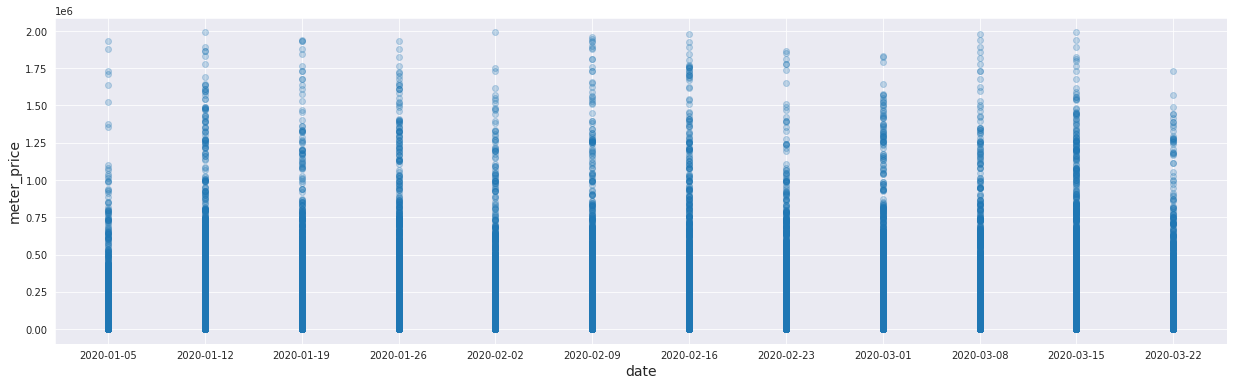

In [24]:
fig = plt.figure(figsize=(21, 6))

plt.scatter(x=df_train['date'][0:n], y=df_train["per_square_meter_price"][0:n], alpha=0.25)
plt.ylabel("meter_price", size=14)
plt.xlabel("date", size=14)

Text(0.5, 0, 'date')

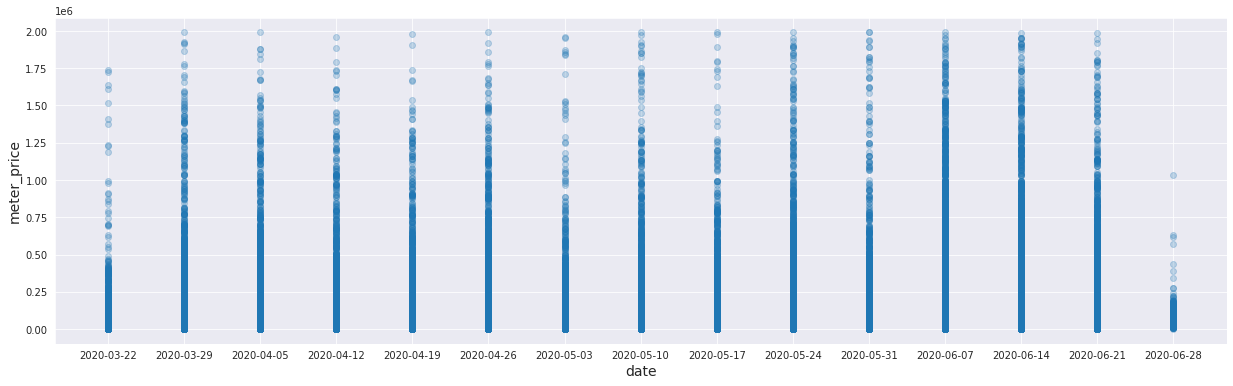

In [25]:
fig = plt.figure(figsize=(21, 6))

plt.scatter(x=df_train['date'][n:2*n], y=df_train["per_square_meter_price"][n:2*n], alpha=0.25)
plt.ylabel("meter_price", size=14)
plt.xlabel("date", size=14)

Text(0.5, 0, 'date')

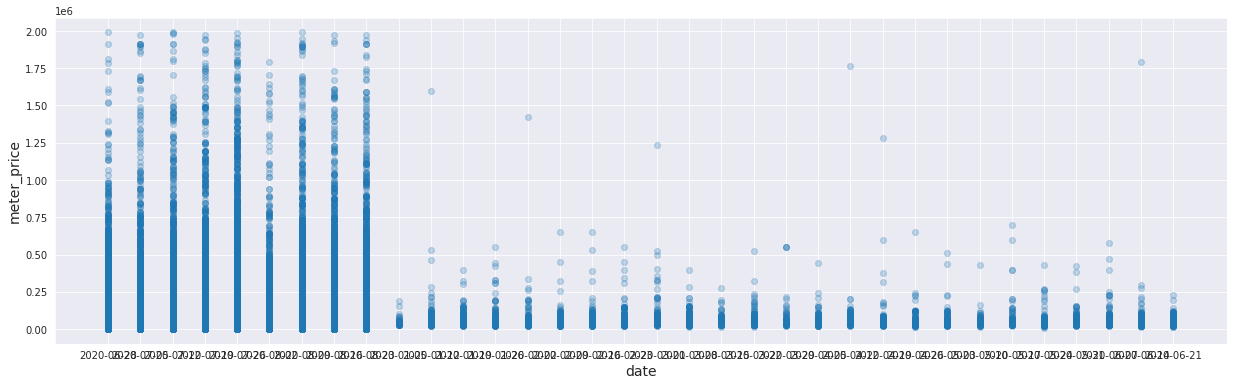

In [26]:
fig = plt.figure(figsize=(21, 6))

plt.scatter(x=df_train['date'][2*n:len(df_train)], y=df_train["per_square_meter_price"][2*n:len(df_train)], alpha=0.25)
plt.ylabel("meter_price", size=14)
plt.xlabel("date", size=14)

Выводы: 
 - после анализа переменной 'date' в разрезе таргета выявлено неравномерное распределение в конце датасета. Далее мы выявим явную причину этого. 

## Анализ числовых переменных

## Дискретные признаки

In [27]:
discrete_feature = [
    feature for feature in numerical_features_train
    if len(df_train[feature].unique())<25 ]

print(f"Discrete Variables Count: {len(discrete_feature)}")

Discrete Variables Count: 9


In [28]:
df_train[discrete_feature].head()

,osm_catering_points_in_0.001,osm_crossing_points_in_0.001,osm_culture_points_in_0.001,osm_finance_points_in_0.001,osm_offices_points_in_0.001,osm_train_stop_points_in_0.005,osm_train_stop_points_in_0.0075,realty_type,price_type
0,0,3,0,0,0,0,0,10,0
1,0,0,0,0,0,0,0,10,0
2,0,0,0,0,0,0,0,110,0
3,0,0,0,0,0,0,0,110,0
4,0,0,0,0,0,0,0,10,0


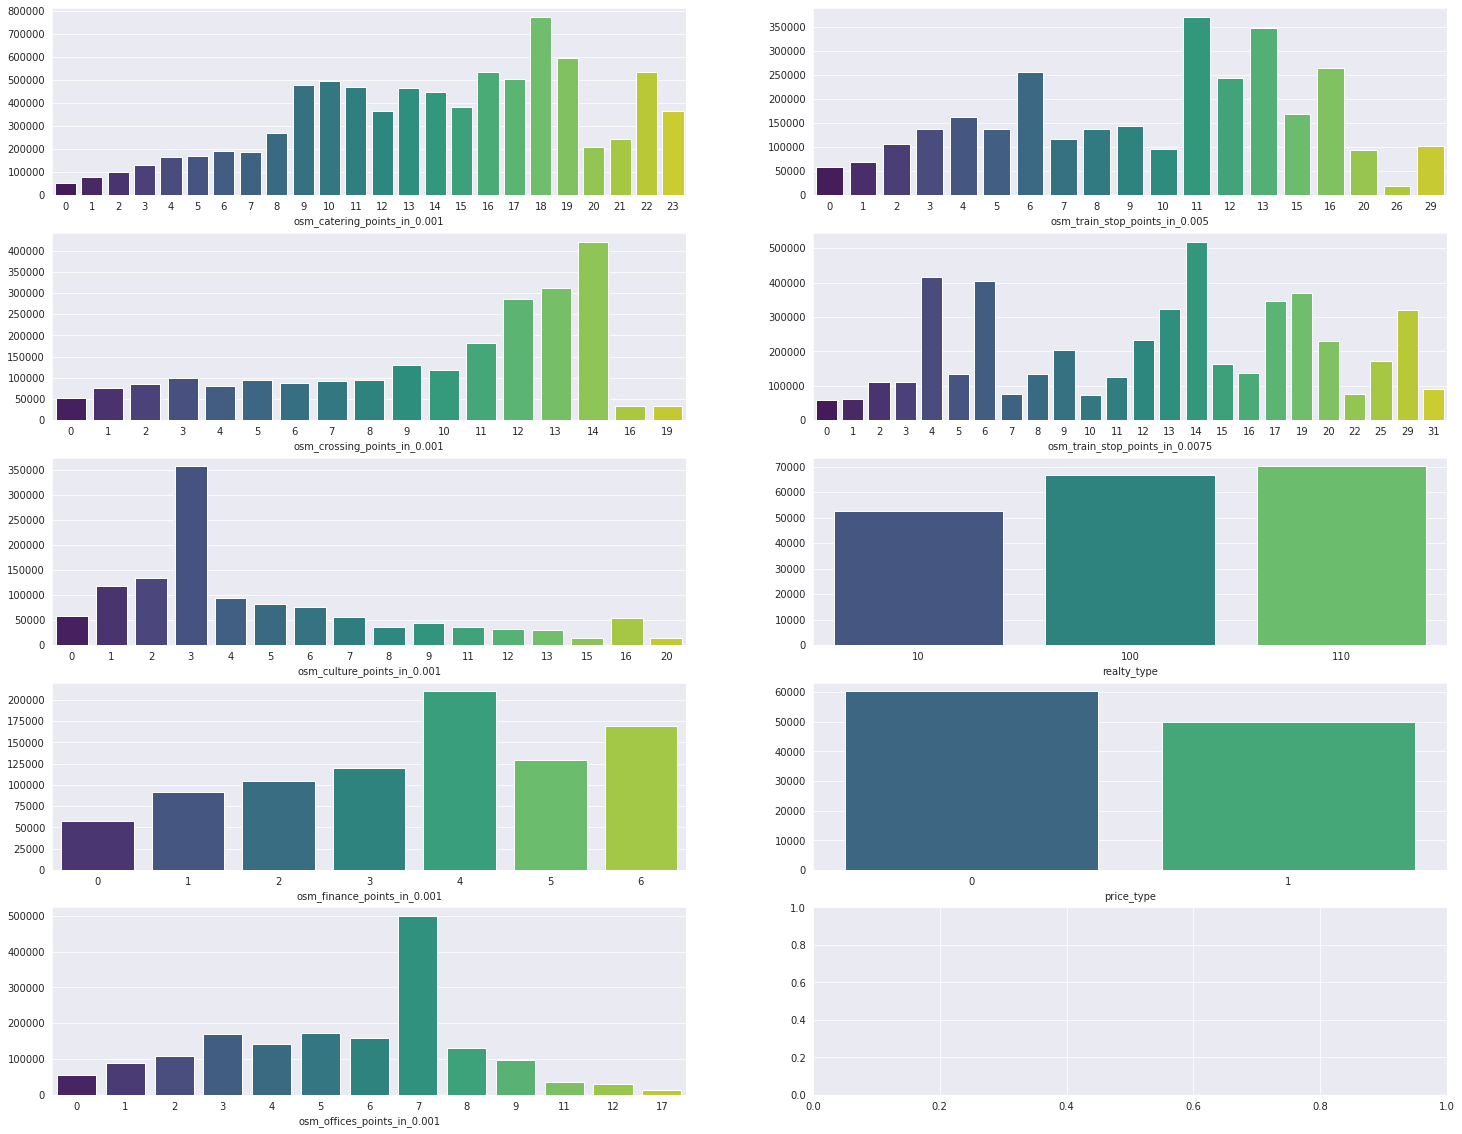

In [29]:
fig, axes = plt.subplots(5, 2, figsize=(25, 20))

for num, feature in enumerate(discrete_feature):
    data = df_train.copy()
    statistics = data.groupby([feature])["per_square_meter_price"].median()

    sns.barplot(
        x=statistics.index,         #индексы
        y=statistics.values,        #медианное значение целевой переменной
        palette="viridis",
        ax=axes[num%5, num//5]
    )

## Непрерывные признаки

In [30]:
continuous_feature_train = [
    feature for feature in numerical_features_train
    if feature not in discrete_feature + ["date"] + ['id']]

print(f"Continuous Feature Count {len(continuous_feature_train)}")

Continuous Feature Count 61


In [31]:
continuous_feature_train.remove("per_square_meter_price")

In [32]:
def feat_continous_graf(group):
    fig, axes = plt.subplots(4, 4, figsize=(15, 15))

    for num, feature in enumerate(group):
        data = df_train[feature].copy()
        axes[num//4, num%4].hist(data, bins=25, color="blue")
        axes[num//4, num%4].set_xlabel(feature, fontsize=14)

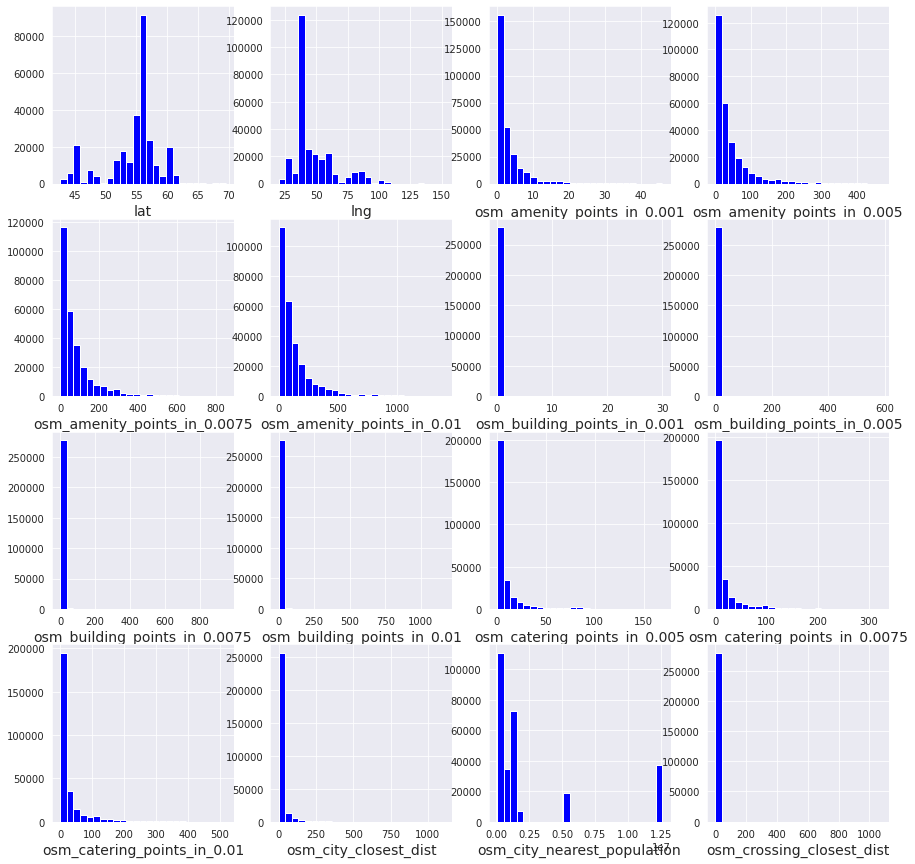

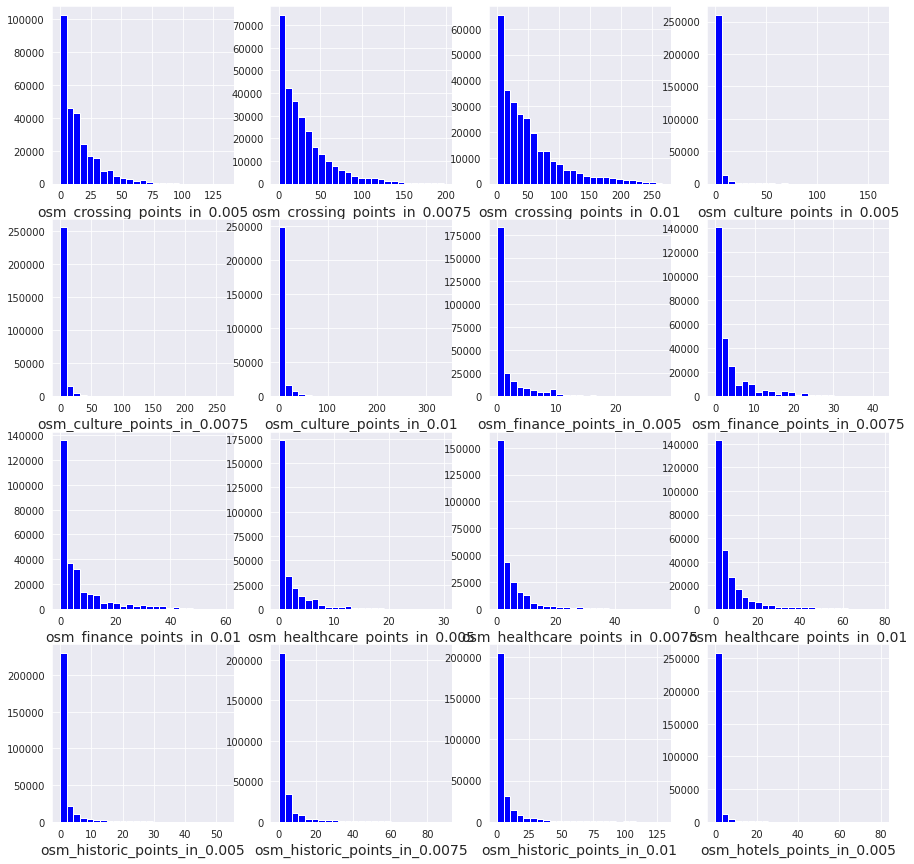

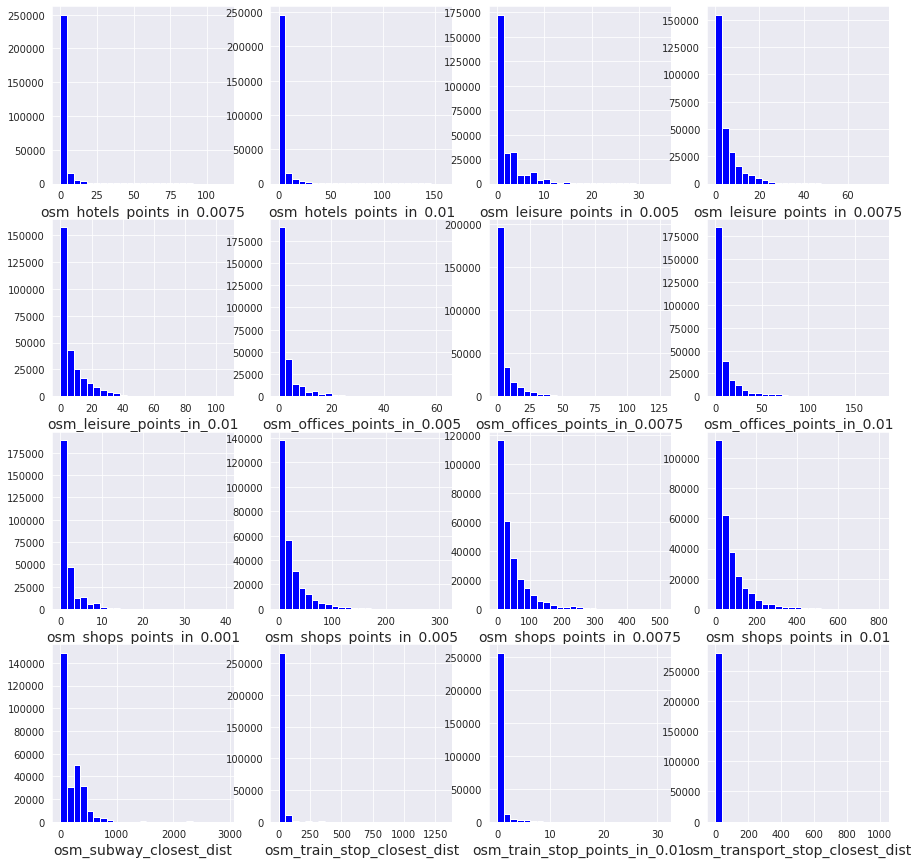

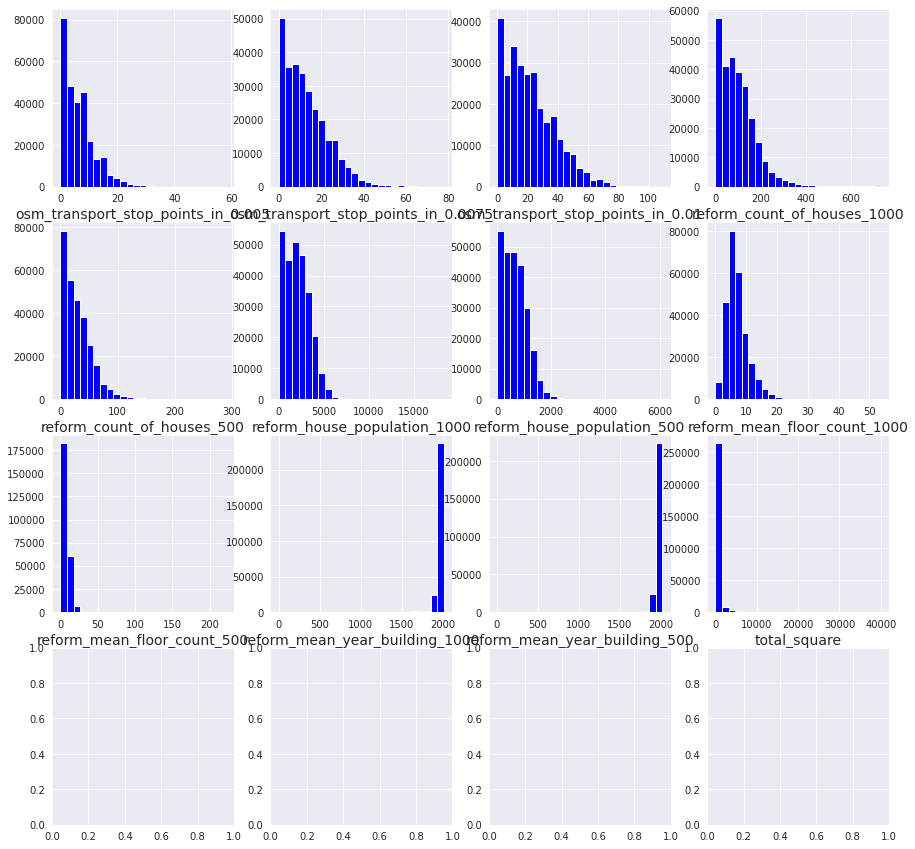

In [33]:
for i in range(4):
    group = continuous_feature_train[i * 16 : (i + 1) * 16]
    feat_continous_graf(group)

In [34]:
#Короткий вывод: с первого взгляда видно, что некоторые непрерывные признаки имеют характерное лог-нормальное распределение. 
#В дальнейшем попробуем их отобрать и сделать преобразование. 

In [35]:
def group_graf(group):
    fig, axes = plt.subplots(4, 4, figsize=(15, 15))

    for num, feature in enumerate(group):
        try:
            train_data, test_data = df_train[feature].copy(), df_test[feature].copy()
            sns.kdeplot(train_data, ax=axes[num//4, num%4], color="blue", label="train")
            sns.kdeplot(test_data, ax=axes[num//4, num%4], color="green", label="test")
        except RuntimeError:
            pass
        except KeyError:
            train_data = train[feature].copy()
            sns.kdeplot(train_data, ax=axes[num//4, num%4], color="blue", label="train")
        axes[num//4, num%4].set_title(feature, fontsize=14)

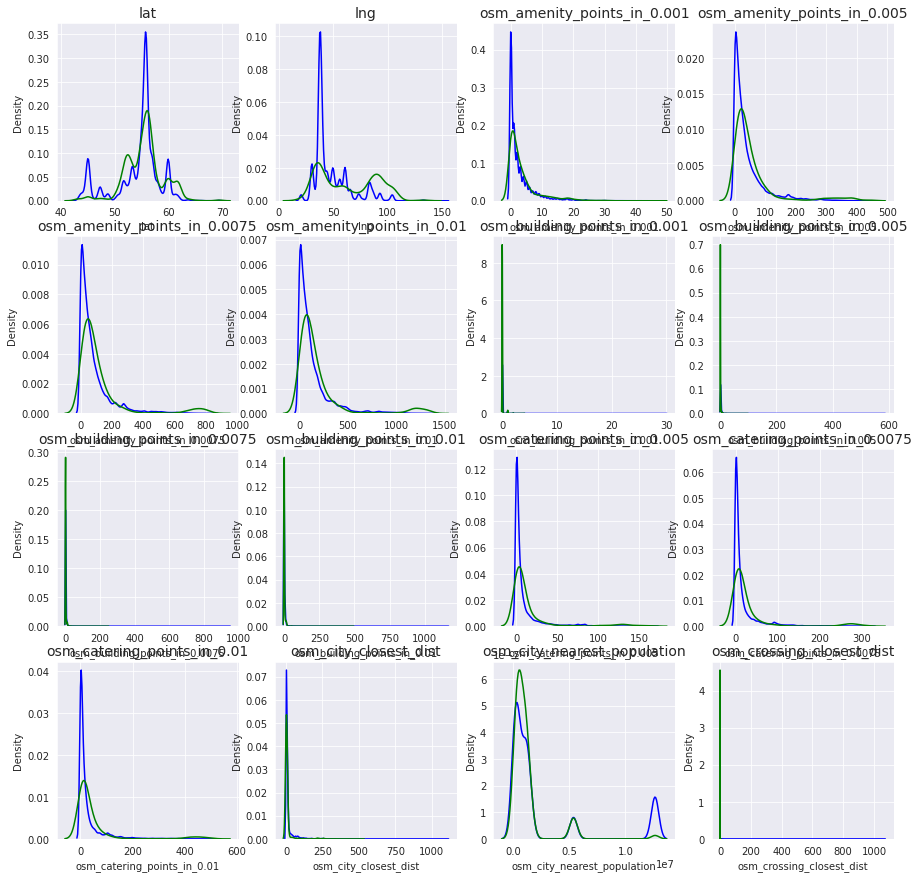

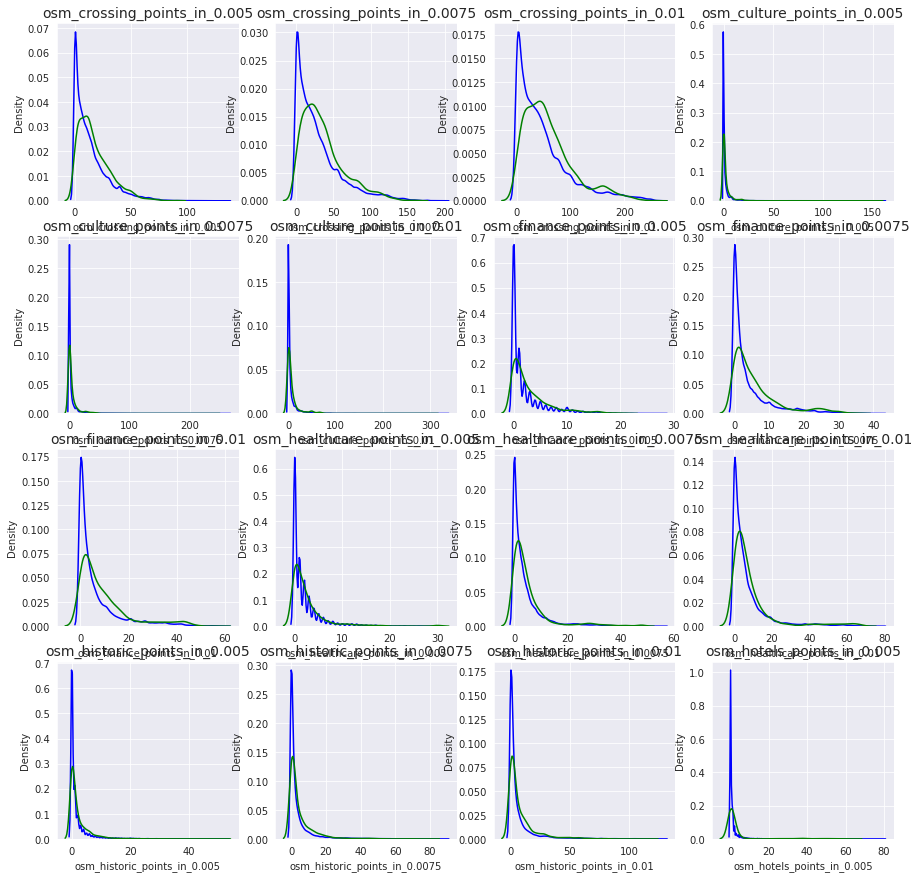

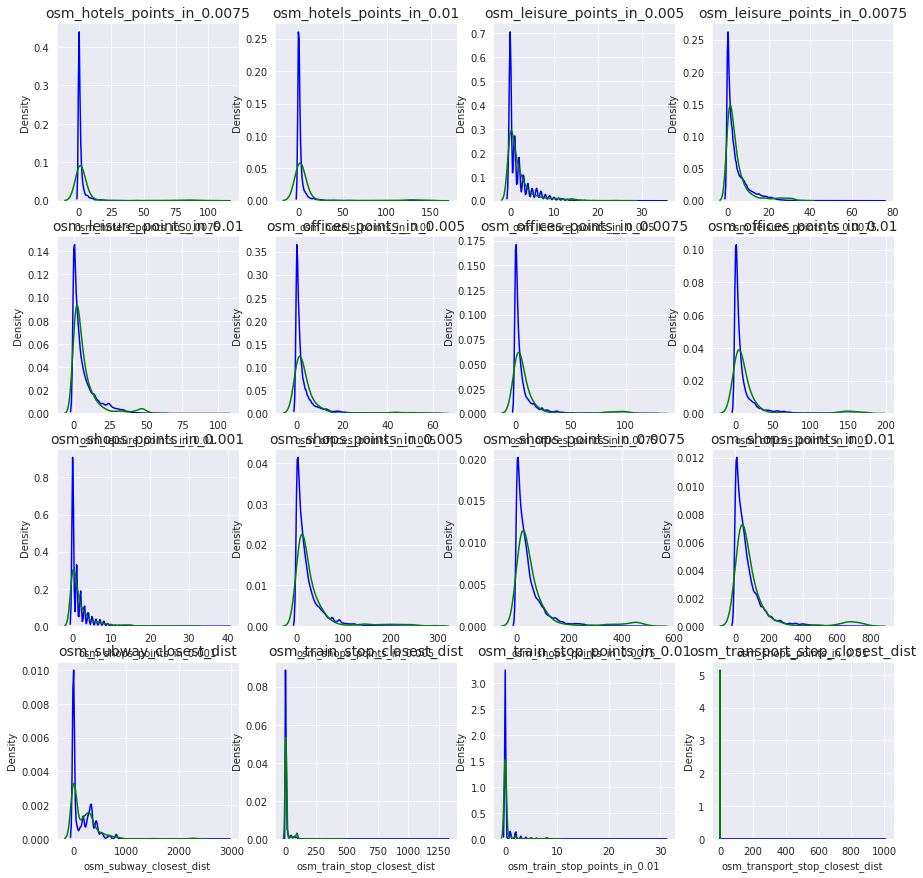

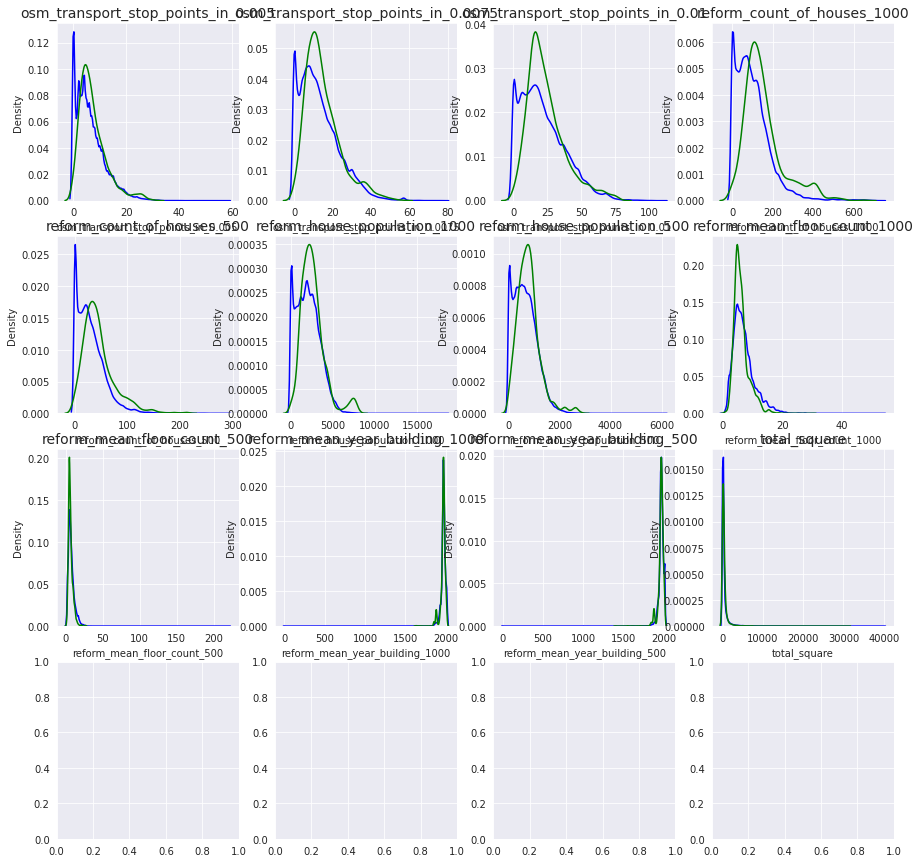

In [36]:
for i in range(4):
    group = continuous_feature_train[i * 16 : (i + 1) * 16]
    group_graf(group)

In [37]:
# Выводы: есть различимые и неразличимые распределения. 
# Видна асимметрия в признаках. Есть смысл более детально рассмотреть kurtosis, skewness

## Категориальные признаки

In [38]:
categorical_features = df_train.select_dtypes(include=[np.object])
print(f"Categorical Feature Count {categorical_features.shape[1]}")
categorical_features.head(n=2)

Categorical Feature Count 7


,city,floor,id,osm_city_nearest_name,region,street,date
0,Пермь,NaN,COL_0,Пермь,Пермский край,S27289,2020-01-05
1,Шатура,NaN,COL_1,Орехово-Зуево,Московская область,S17052,2020-01-05


In [39]:
categorical_features = categorical_features.drop('date', axis=1)

__floor__

In [40]:
df_train.floor.unique()

array([nan, 3.0, 4.0, -1.0, 1.0, 14.0, 2.0, 8.0, -2.0, 6.0, 10.0, 5.0,
       16.0, 19.0, 7.0, 9.0, 58.0, 24.0, 18.0, 26.0, 17.0, 48.0, 11.0,
       -3.0, 15.0, 22.0, 60.0, 12.0, 21.0, 35.0, 28.0, 38.0, 39.0, 13.0,
       81.0, 44.0, 82.0, 25.0, 45.0, 47.0, 23.0, 37.0, 29.0, 113.0, 78.0,
       42.0, 69.0, 27.0, 46.0, 53.0, 80.0, 70.0, 76.0, 64.0, 30.0, 73.0,
       77.0, 52.0, 67.0, 65.0, 20.0, 40.0, 49.0, 75.0, 93.0, 94.0, 91.0,
       72.0, 79.0, 84.0, 92.0, 33.0, 66.0, 90.0, 31.0, 36.0, 61.0, 71.0,
       68.0, 51.0, 97.0, 43.0, 95.0, 85.0, 50.0, 0.0, 62.0, 54.0, 74.0,
       57.0, 41.0, 34.0, 59.0, 56.0, 123.0, 55.0, 83.0, '27.0', '1.0',
       '5.0', '-1.0', '67.0', '2.0', '0.0', '4.0', '6.0', '3.0', '15.0',
       '10.0', '11.0', '30.0', '12.0', '-2.0', '14.0', '36.0', '8.0',
       '50.0', '17.0', '19.0', '37.0', '68.0', '7.0', '42.0', '9.0',
       '16.0', '20.0', '53.0', '91.0', '84.0', '38.0', '21.0', '48.0',
       '22.0', '23.0', '1', '18.0', 'подвал, 1', '2', 'подвал',
  

In [41]:
df_test.floor.unique()

array(['1.0', '-1.0', nan, '2,3', '2', '-2.0', '5.0', '4', '1', '5',
       '1, 2', '1,2,3', '2.0', '4.0', '1,2,3,4', 'цоколь', '3', 'подвал',
       '3.0', '11.0', '9.0', '12.0', '0.0', 'цоколь, 1, 2,3,4,5,6', '6',
       '1,2', ' 1, 2, Антресоль', '6.0', '3 этаж, мансарда (4 этаж)',
       'цокольный', '1-й, 2-й', '13', '1, подвал', '7', '1, 2, 3', '1,2 ',
       '14', '9', 'подвал,1', '1-й', '8', '3,4', 'мансарда',
       'подвал, 1 и 4 этаж', '10.0', '5(мансарда)',
       'технический этаж,5,6', ' 1-2, подвальный', '1, 2, 3, мансардный',
       '8.0', '7.0', 'подвал, 1, 2, 3',
       '1,2,3, антресоль, технический этаж', '3, 4', '4, 5',
       '1-3 этажи, цоколь (188,4 кв.м), подвал (104 кв.м)',
       '1,2,3,4, подвал', '2-й', '1, 2 этаж', '1,2,3,4,5', 'подвал, 1, 2',
       '1-7', '1 (по док-м цоколь)', '1-й, подвал', '10', '1,2,подвал ',
       '13.0', 'подвал, 2', '1, цоколь', 'подвал,1,2,3',
       '1,2,3 этаж, подвал', 'цоколь, 1', '2, 3, 4, тех.этаж',
       'цокольный, 1,2'

In [42]:
df_train.floor = df_train.floor.fillna('unknown')
df_test.floor = df_test.floor.fillna('unknown')

In [43]:
df_train['floor'] = df_train['floor'].map(lambda x: str(x))
df_test['floor'] = df_test['floor'].map(lambda x: str(x))

In [44]:
def floor_transformation(df):
    for floor in df.floor.unique():
        try:
            floor_ = float(floor)
            if floor_<=0:
                df.loc[df['floor'] == floor, 'New_floor'] = '-1'
            if floor_==1:
                df.loc[df['floor'] == floor, 'New_floor'] = '1'
            if floor_==2:
                df.loc[df['floor'] == floor, 'New_floor'] = '2'
            if floor_ >= 3 and floor_ <5:
                df.loc[df['floor'] == floor, 'New_floor'] = '3'
            if floor_>=5 and floor_ <10:
                df.loc[df['floor'] == floor, 'New_floor'] = '4'
            if floor_>=10 and floor_<20:
                df.loc[df['floor'] == floor, 'New_floor'] = '5'
            if floor_>=20 and floor_<50:
                df.loc[df['floor'] == floor, 'New_floor'] = '6'
            if floor_>=50 and floor_<90:
                df.loc[df['floor'] == floor, 'New_floor'] = '7'
            if floor_>=90 and floor_<130:
                df.loc[df['floor'] == floor, 'New_floor'] = '8'
        except:
            floor_ = floor.lower()
            if 'подвал' or 'подва' in floor_:
                df.loc[df['floor'] == floor, 'New_floor'] = 'подвал'
            if 'цоколь' in floor_:
                df.loc[df['floor'] == floor, 'New_floor'] = 'цоколь'
            if 'мансарда' in floor_:
                df.loc[df['floor'] == floor, 'New_floor'] = 'мансарда'
            if 'unknown' in floor_:
                df.loc[df['floor'] == floor, 'New_floor'] = 'unknown'
    return df

In [45]:
df_train = floor_transformation(df_train)

In [46]:
df_test = floor_transformation(df_test)

In [47]:
df_train.New_floor.unique()

array(['unknown', '3', '-1', '1', '5', '2', '4', '7', '6', '8', 'подвал',
       'цоколь', 'мансарда', nan], dtype=object)

In [48]:
df_test.New_floor.unique()

array(['1', '-1', 'unknown', 'подвал', '2', '4', '3', 'цоколь', '5',
       'мансарда'], dtype=object)

In [49]:
df_train['New_floor'] = df_train['New_floor'].fillna('unknown')

In [50]:
#Street - уже было закодировано организаторами
#city, region, osm city nearest name кодировать не стал, хотя, возможно и стоило бы. По этим трем признакам обрабатывал только
#пропуски. 

## Анализ распределения целевой переменной

In [51]:
target = 'per_square_meter_price'

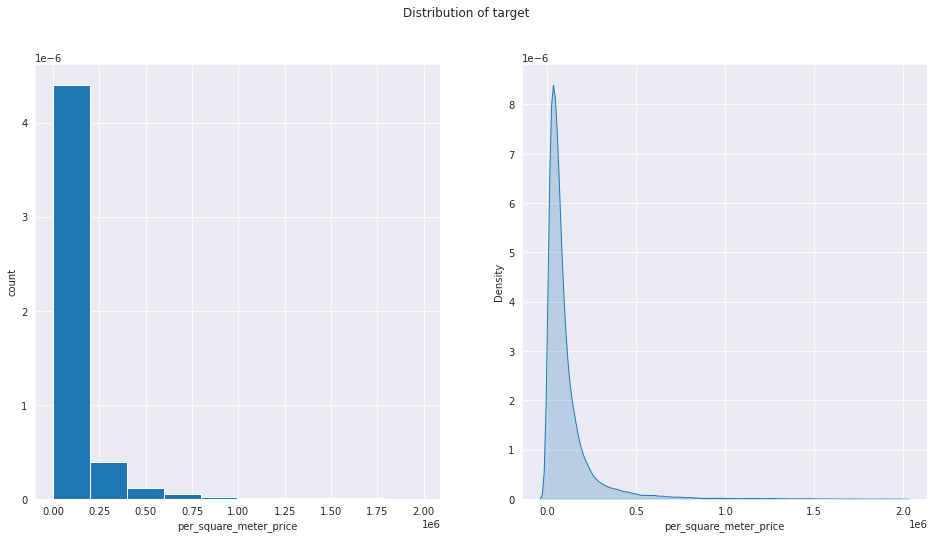

In [52]:
plt.figure(figsize = (16, 8))

plt.subplot(121)
df_train['per_square_meter_price'].hist(density=True)  # density=True  # shift + Tab = спарвка по функции
plt.ylabel('count')
plt.xlabel('per_square_meter_price')

plt.subplot(122)
sns.kdeplot(df_train['per_square_meter_price'], shade=True, legend=False)
plt.xlabel('per_square_meter_price')

plt.suptitle('Distribution of target')
plt.show()

In [53]:
df_train["per_square_meter_price_log"] = np.log(df_train["per_square_meter_price"])

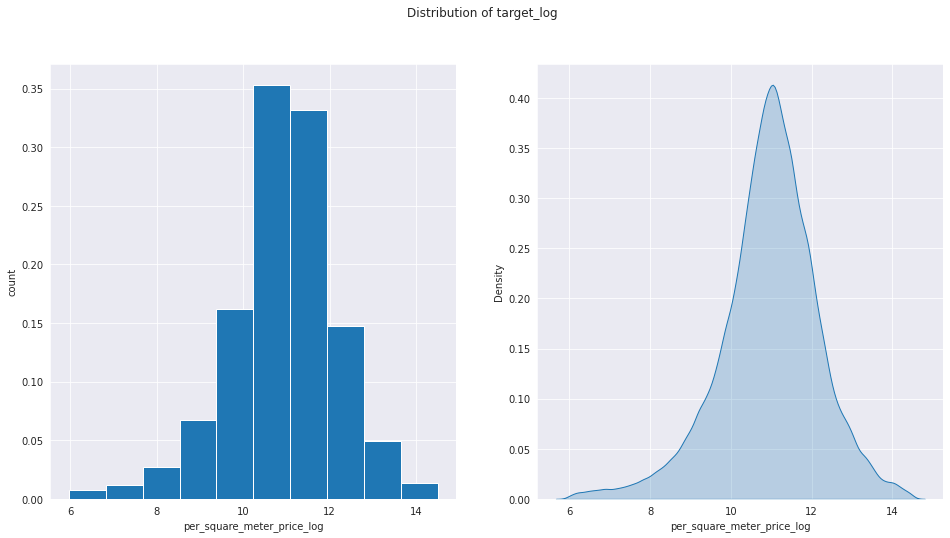

In [54]:
plt.figure(figsize = (16, 8))

plt.subplot(121)
df_train['per_square_meter_price_log'].hist(density=True)  # density=True  # shift + Tab = спарвка по функции
plt.ylabel('count')
plt.xlabel('per_square_meter_price_log')

plt.subplot(122)
sns.kdeplot(df_train['per_square_meter_price_log'], shade=True, legend=False)
plt.xlabel('per_square_meter_price_log')

plt.suptitle('Distribution of target_log')
plt.show()

In [55]:
(mu, sigma) = norm.fit(df_train['per_square_meter_price_log'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))


 mu = 10.93 and sigma = 1.23



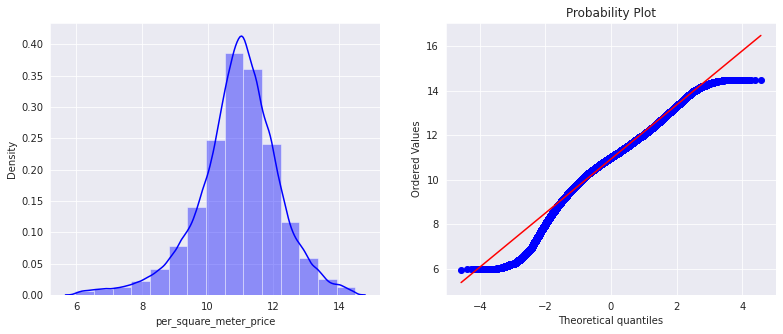

In [56]:
target = np.log(df_train['per_square_meter_price'])
fig = plt.figure(figsize=(13, 5))
plt.subplot(121)
sns.distplot(target, bins=15, color="blue")
plt.subplot(122)
probplot(target, plot=plt)
plt.show()

In [57]:
# в данный момент можно считать, что 'per_square_meter_price_log' распределеный нормально. 

Важно: целевая переменная распределена логнормально. Лучше всего сделать логорифмирование, обучать логарифм цены на трейне, а потом сделать потенциирование (возведение в степень числа e) 

Проверим также переменные с высоким skew:

In [58]:
skew_features = numerical_features_train.apply(lambda x: skew(x)).sort_values(ascending=False)

high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index

print("В датасете {} числовых переменных с  Skew > 0.5 :".format(high_skew.shape[0]))
skewness = pd.DataFrame({'Skew' :high_skew})
skew_features.head(10)

В датасете 61 числовых переменных с  Skew > 0.5 :


osm_crossing_closest_dist          99.732951
osm_transport_stop_closest_dist    91.797894
osm_building_points_in_0.005       28.367982
osm_building_points_in_0.001       26.812293
osm_building_points_in_0.0075      23.840202
osm_building_points_in_0.01        18.743050
osm_train_stop_points_in_0.005     12.253196
total_square                       10.614895
osm_culture_points_in_0.005        10.455274
osm_culture_points_in_0.001         9.518912
dtype: float64

Text(0.5, 0, 'total_square')

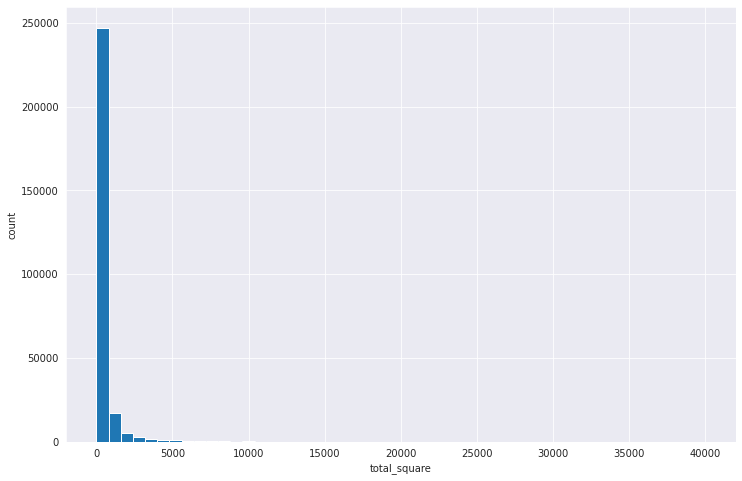

In [59]:
df_train.loc[:, 'total_square'].hist(figsize=(12, 8), bins=50)  # density=True  # shift + Tab = спарвка по функции
plt.ylabel('count')
plt.xlabel('total_square')

In [60]:
df_train["total_square_log"] = np.log(df_train["total_square"])

In [61]:
df_test["total_square_log"] = np.log(df_test["total_square"])

Text(0.5, 0, 'total_square')

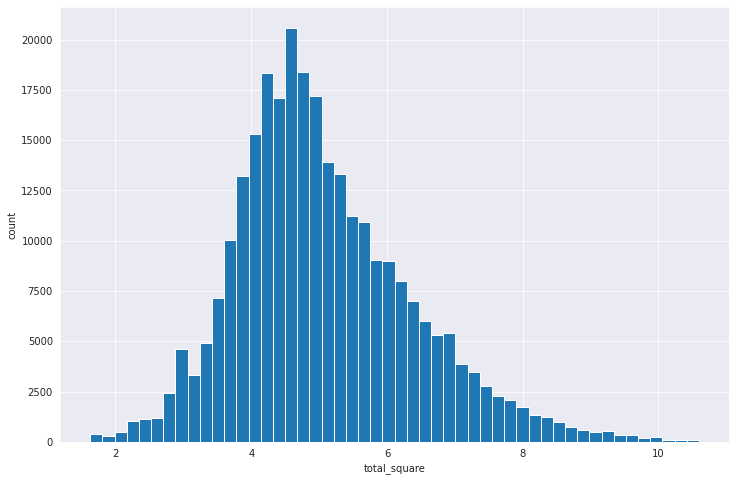

In [62]:
df_train.loc[:, 'total_square_log'].hist(figsize=(12, 8), bins=50)  # density=True  # shift + Tab = спарвка по функции
plt.ylabel('count')
plt.xlabel('total_square')

In [63]:
#Отлично, берем этот признак в log. 

## **Метрика**

In [64]:
import typing
import numpy as np

THRESHOLD = 0.15
NEGATIVE_WEIGHT = 1.1

def deviation_metric_one_sample(y_true: typing.Union[float, int], y_pred: typing.Union[float, int]) -> float:
    """
    Реализация кастомной метрики для хакатона.

    :param y_true: float, реальная цена
    :param y_pred: float, предсказанная цена
    :return: float, значение метрики
    """
    deviation = (y_pred - y_true) / np.maximum(1e-8, y_true)
    if np.abs(deviation) <= THRESHOLD:
        return 0
    elif deviation <= - 4 * THRESHOLD:
        return 9 * NEGATIVE_WEIGHT
    elif deviation < -THRESHOLD:
        return NEGATIVE_WEIGHT * ((deviation / THRESHOLD) + 1) ** 2
    elif deviation < 4 * THRESHOLD:
        return ((deviation / THRESHOLD) - 1) ** 2
    else:
        return 9


def deviation_metric(y_true, y_pred, isLog=False) -> float:
    if isLog:
        y_pred = np.exp(y_pred)
        y_true = np.exp(y_true)
    return np.array([deviation_metric_one_sample(y_true[n], y_pred[n]) for n in range(len(y_true))]).mean()

def median_absolute_percentage_error(y_true: np.array, y_pred: np.array) -> float:
    return np.median(np.abs(y_pred-y_true)/y_true)

def metrics_stat(y_true: np.array, y_pred: np.array) -> typing.Dict[str,float]:
    mape = mean_absolute_percentage_error(y_true, y_pred)
    mdape = median_absolute_percentage_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    r2 = r2_score(y_true, y_pred)
    raif_metric = deviation_metric(y_true, y_pred)
    return {'mape':mape, 'mdape':mdape, 'rmse': rmse, 'r2': r2, 'raif_metric':raif_metric}

EPS = 1e-8
assert deviation_metric(np.array([1,2,3,4,5]),np.array([1,2,3,4,5])) <= EPS
assert deviation_metric(np.array([1,2,3,4,5]),np.array([0.9,1.8,2.7,3.6,4.5])) <= EPS
assert deviation_metric(np.array([1,2,3,4,5]),np.array([1.1,2.2,3.3,4.4,5.5])) <= EPS
assert deviation_metric(np.array([1,2,3,4,5]),np.array([1.15,2.3,3.45,4.6,5.75])) <= EPS
assert np.abs(deviation_metric(np.array([1,2,3,4,5]),np.array([1.3,2.6,3.9,5.2,6.5]))-1) <= EPS
assert np.abs(deviation_metric(np.array([1,2,3,4,5]),np.array([0.7,1.4,2.1,2.8,3.5]))-1*NEGATIVE_WEIGHT) <= EPS
assert np.abs(deviation_metric(np.array([1,2,3,4,5]),np.array([10,20,30,40,50]))-9) <= EPS
assert np.abs(deviation_metric(np.array([1,2,3,4,5]),np.array([0,0,0,0,0]))-9*NEGATIVE_WEIGHT) <= EPS
assert np.abs(deviation_metric(np.array([1,2,3,4,5]),np.array([1,2.2,3.3,5,50])) - 85/45) <= EPS

## Внимание к price_type == 1 

In [65]:
## сами организаторы подкинули вот такой инсайт: бейзлайн обучен на ценах price_type==1 (цены не из объявлений, а от оценщиков). 
# Опытные участники сразу поняли "что к чему", ну а я как начинающий специалист осознал, что нужно сфокусироваться на этом только ко дню 
# субботы, когда обнаружил, что price_type==1 есть только на тесте. 

In [66]:
buf_train = df_train[df_train['price_type']==1]

In [67]:
buf_train.head()

,city,floor,id,lat,lng,osm_amenity_points_in_0.001,osm_amenity_points_in_0.005,osm_amenity_points_in_0.0075,osm_amenity_points_in_0.01,osm_building_points_in_0.001,osm_building_points_in_0.005,osm_building_points_in_0.0075,osm_building_points_in_0.01,osm_catering_points_in_0.001,osm_catering_points_in_0.005,osm_catering_points_in_0.0075,osm_catering_points_in_0.01,osm_city_closest_dist,osm_city_nearest_name,osm_city_nearest_population,osm_crossing_closest_dist,osm_crossing_points_in_0.001,osm_crossing_points_in_0.005,osm_crossing_points_in_0.0075,osm_crossing_points_in_0.01,osm_culture_points_in_0.001,osm_culture_points_in_0.005,osm_culture_points_in_0.0075,osm_culture_points_in_0.01,osm_finance_points_in_0.001,osm_finance_points_in_0.005,osm_finance_points_in_0.0075,osm_finance_points_in_0.01,osm_healthcare_points_in_0.005,osm_healthcare_points_in_0.0075,osm_healthcare_points_in_0.01,osm_historic_points_in_0.005,osm_historic_points_in_0.0075,osm_historic_points_in_0.01,osm_hotels_points_in_0.005,osm_hotels_points_in_0.0075,osm_hotels_points_in_0.01,osm_leisure_points_in_0.005,osm_leisure_points_in_0.0075,osm_leisure_points_in_0.01,osm_offices_points_in_0.001,osm_offices_points_in_0.005,osm_offices_points_in_0.0075,osm_offices_points_in_0.01,osm_shops_points_in_0.001,osm_shops_points_in_0.005,osm_shops_points_in_0.0075,osm_shops_points_in_0.01,osm_subway_closest_dist,osm_train_stop_closest_dist,osm_train_stop_points_in_0.005,osm_train_stop_points_in_0.0075,osm_train_stop_points_in_0.01,osm_transport_stop_closest_dist,osm_transport_stop_points_in_0.005,osm_transport_stop_points_in_0.0075,osm_transport_stop_points_in_0.01,per_square_meter_price,reform_count_of_houses_1000,reform_count_of_houses_500,reform_house_population_1000,reform_house_population_500,reform_mean_floor_count_1000,reform_mean_floor_count_500,reform_mean_year_building_1000,reform_mean_year_building_500,region,total_square,street,date,realty_type,price_type,New_floor,per_square_meter_price_log,total_square_log
275299,Красноярск,unknown,COL_62,56.063615,92.958428,0,7,14,26,0,0,0,0,0,0,0,2,7.795659,Красноярск,1095286.0,0.041323,2,6,25,35,0,0,0,2,0,1,2,3,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,5,10,15,1.087101,2.281425,0,0,0,0.052809,7,15,21,103120.697310,95,31,2670.0,940.0,7.136842,7.612903,1976.684211,1980.483871,Красноярский край,106.351104,S5845,2020-01-05,110,1,unknown,11.543655,4.666746
275300,Саратов,unknown,COL_71,51.534581,46.020549,13,198,345,462,0,0,0,0,4,44,66,89,0.987160,Саратов,842097.0,0.144936,0,4,34,59,0,1,6,9,0,13,22,27,7,17,27,4,7,9,2,5,7,11,16,20,1,11,21,28,8,125,218,286,357.425239,1.924421,0,0,0,0.045451,22,34,45,24874.371004,502,104,4886.0,943.0,4.144608,4.164557,1940.591549,1939.348837,Саратовская область,175.039602,S27968,2020-01-05,10,1,unknown,10.121593,5.165012
275301,Красноярск,unknown,COL_140,56.026884,92.818323,3,15,23,33,0,0,0,0,0,1,3,4,3.730568,Красноярск,1095286.0,0.141526,0,16,35,56,0,0,0,0,2,3,3,3,0,1,1,3,3,3,0,0,1,2,2,2,0,2,2,3,1,5,10,18,1.621353,0.579096,0,0,2,0.223787,6,11,18,80058.148547,175,66,4282.0,1445.0,6.851429,5.742424,1976.714286,1972.878788,Красноярский край,89.534921,S23597,2020-01-05,10,1,unknown,11.290509,4.494629
275302,Иркутск,unknown,COL_202,52.275528,104.251444,0,10,26,40,0,1,1,1,0,2,6,8,2.344310,Иркутск,623562.0,0.281491,0,6,6,6,0,0,0,0,0,0,0,1,0,4,4,0,0,0,0,1,2,1,2,2,0,1,1,1,0,5,11,21,61.562546,0.813594,0,0,2,0.266067,8,11,19,24649.765045,230,56,1887.0,612.0,4.597222,5.469388,1968.098131,1975.530612,Иркутская область,419.557752,S10587,2020-01-05,10,1,unknown,10.112523,6.039201
275303,Белгород,unknown,COL_207,50.576545,36.584197,4,48,73,92,0,0,6,6,1,7,11,15,2.170184,Белгород,384425.0,0.065996,1,19,28,46,1,5,10,11,0,2,2,4,3,3,4,2,2,2,0,2,2,10,11,15,0,0,0,0,1,19,29,36,555.411948,2.505330,0,0,0,0.092583,7,17,22,39135.228322,131,35,3837.0,1073.0,9.157480,9.088235,1983.125984,1980.470588,Белгородская область,1098.703185,S11220,2020-01-05,10,1,unknown,10.574778,7.001886


Text(0.5, 0, 'date')

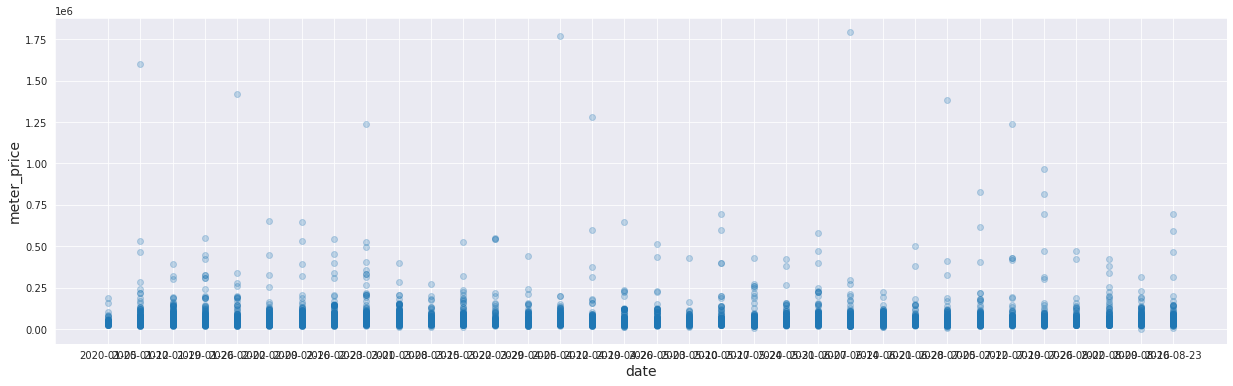

In [68]:
fig = plt.figure(figsize=(21, 6))

plt.scatter(x=buf_train['date'], y=buf_train["per_square_meter_price"], alpha=0.25)
plt.ylabel("meter_price", size=14)
plt.xlabel("date", size=14)

## **Анализируем и заполняем пропуски**

In [69]:
def check_missing_values(df):
    columns = df.columns.values.tolist()
    columns_with_nan = []
    for n in columns:
        if df[n].isna().sum() > 0:
            columns_with_nan.append(n)
            print(f"столбец '{n}' -  пропусков в столбце: {df[n].isna().sum()}")
    return list(columns_with_nan)

In [70]:
mis_columns_train = check_missing_values(df_train)

столбец 'osm_city_nearest_population' -  пропусков в столбце: 55
столбец 'reform_house_population_1000' -  пропусков в столбце: 14596
столбец 'reform_house_population_500' -  пропусков в столбце: 27234
столбец 'reform_mean_floor_count_1000' -  пропусков в столбце: 16708
столбец 'reform_mean_floor_count_500' -  пропусков в столбце: 30168
столбец 'reform_mean_year_building_1000' -  пропусков в столбце: 16239
столбец 'reform_mean_year_building_500' -  пропусков в столбце: 29637
столбец 'street' -  пропусков в столбце: 1606


In [71]:
mis_columns_test = check_missing_values(df_test)

столбец 'reform_house_population_1000' -  пропусков в столбце: 35
столбец 'reform_house_population_500' -  пропусков в столбце: 48
столбец 'reform_mean_floor_count_1000' -  пропусков в столбце: 35
столбец 'reform_mean_floor_count_500' -  пропусков в столбце: 48
столбец 'reform_mean_year_building_1000' -  пропусков в столбце: 35
столбец 'reform_mean_year_building_500' -  пропусков в столбце: 48
столбец 'street' -  пропусков в столбце: 6


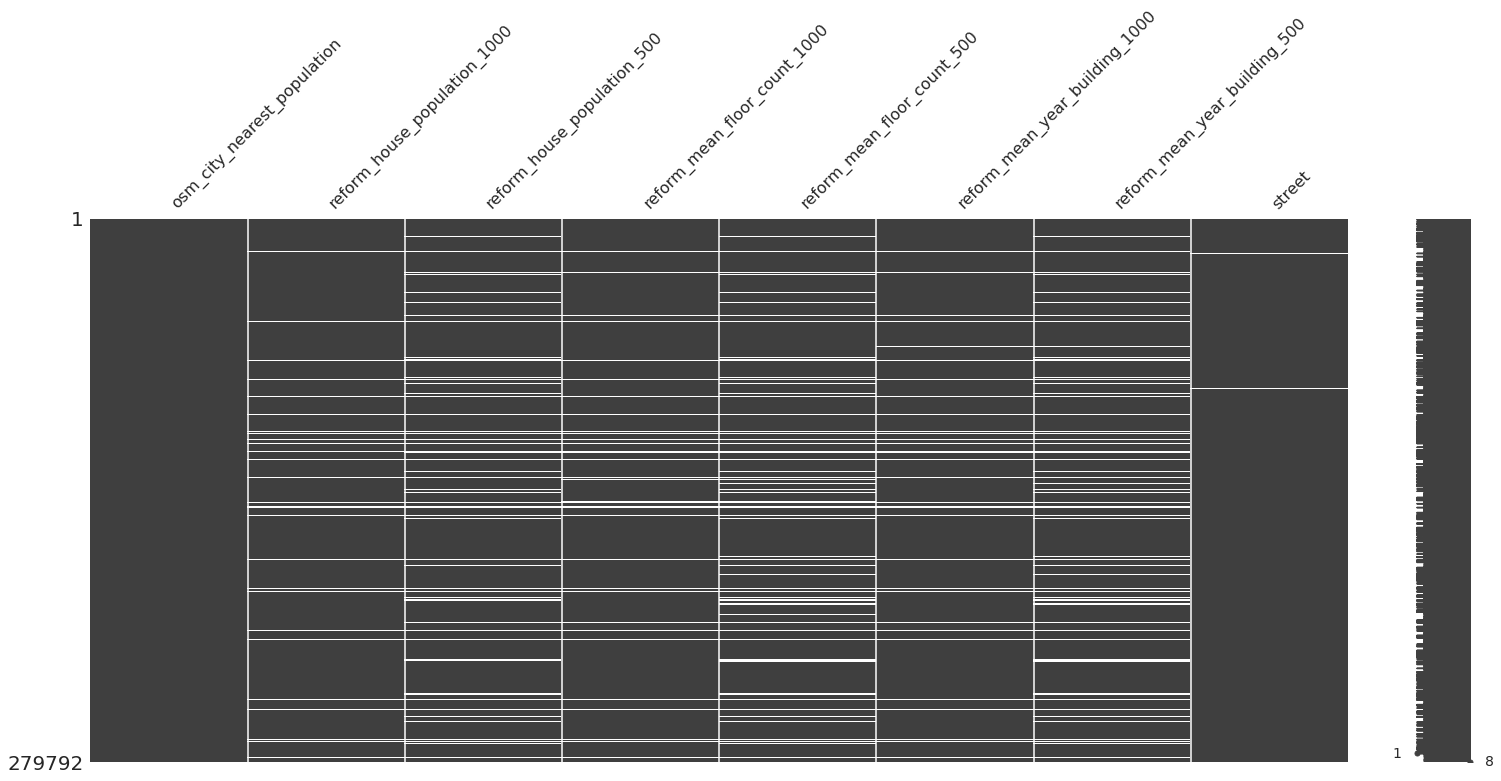

In [72]:
msno.matrix(df_train[mis_columns_train])

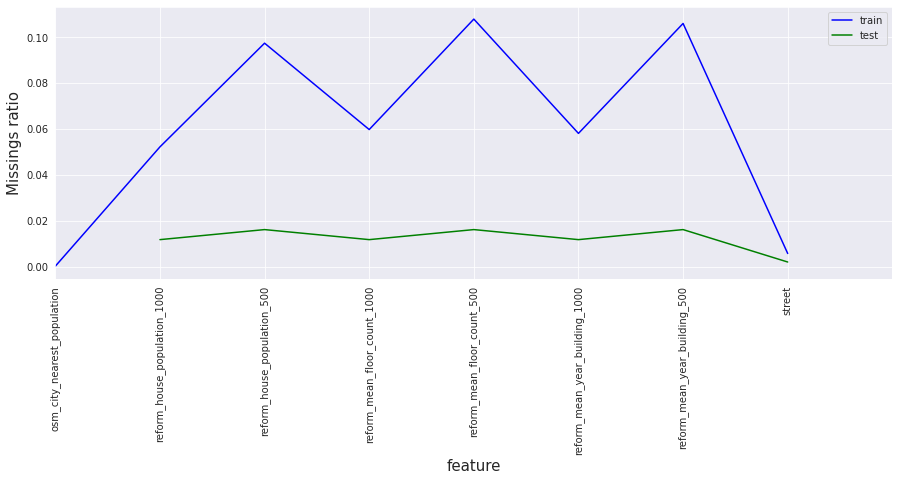

In [73]:
fig = plt.figure(figsize=(15, 5))
plt.plot(df_train[mis_columns_train].isnull().mean(), label="train", color="blue")
plt.plot(df_test[mis_columns_test].isnull().mean(), label="test", color="green")
plt.xticks(range(df_train[mis_columns_train].shape[1]), df_train[mis_columns_train].columns, rotation=90)
plt.ylabel("Missings ratio", size=15)
plt.xlabel("feature", size=15)
plt.xlim(0, df_train[mis_columns_train].shape[1])
plt.legend(loc="best")

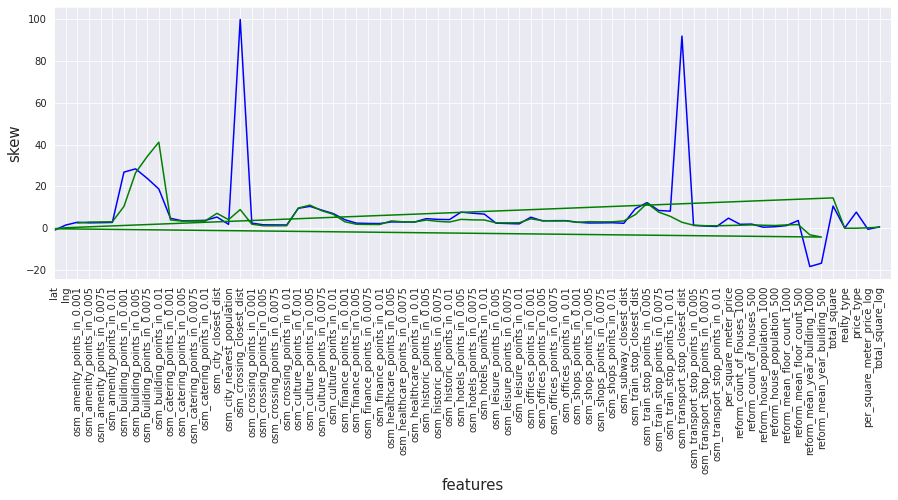

In [74]:
fig = plt.figure(figsize=(15, 5))
train_stats, test_stats = df_train.skew(), df_test.skew()
plt.plot(train_stats, color="blue", label="train")
plt.plot(test_stats, color="green", label="test")
plt.xticks(range(train_stats.shape[0]), train_stats.index, rotation=90)
plt.xlabel("features", size=15)
plt.xlim(0, len(train_stats))
plt.ylabel("skew", size=15)
plt.show()

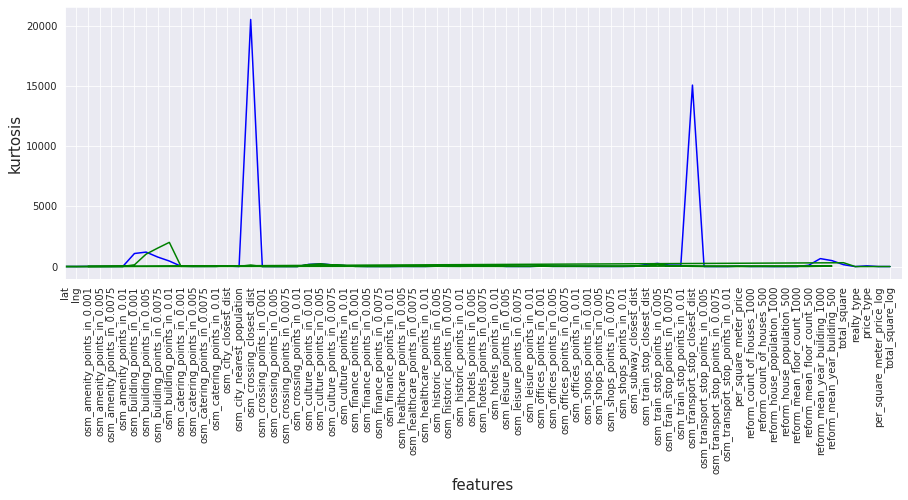

In [75]:
fig = plt.figure(figsize=(15, 5))
train_stats, test_stats = df_train.kurtosis(), df_test.kurtosis()
plt.plot(train_stats, color="blue", label="train")
plt.plot(test_stats, color="green", label="test")
plt.xticks(range(train_stats.shape[0]), train_stats.index, rotation=90)
plt.xlabel("features", size=15)
plt.ylabel("kurtosis", size=15)
plt.xlim(0, len(train_stats))
plt.show()

In [76]:
df_train['osm_city_nearest_population'] = df_train['osm_city_nearest_population'].fillna(0)

In [77]:
df_train['osm_city_nearest_population'].isna().sum()

0

In [78]:
df_test['osm_city_nearest_population'].isna().sum()

0

__City__

In [79]:
df_train['street'].isna().sum()

1606

In [80]:
df_train['street'].value_counts()

S12711    4991
S24233    2668
S20099    2249
S14617    1785
S9675     1446
          ... 
S27912       1
S31908       1
S9050        1
S20542       1
S2173        1
Name: street, Length: 28841, dtype: int64

In [81]:
df_train['street'] = df_train['street'].fillna('S_unk')

In [82]:
df_test['street'] = df_test['street'].fillna('S_unk')

In [83]:
df_train['street'].isna().sum()

0

In [84]:
df_test['street'].isna().sum()

0

## Корреляция между числовыми признаками

In [85]:
numerical_features_upd = df_train.select_dtypes(include=[np.number])
print(f"count of numeric_features {numerical_features_upd.shape[1]}")

numerical_features_upd.columns

count of numeric_features 72


Index(['lat', 'lng', 'osm_amenity_points_in_0.001',
       'osm_amenity_points_in_0.005', 'osm_amenity_points_in_0.0075',
       'osm_amenity_points_in_0.01', 'osm_building_points_in_0.001',
       'osm_building_points_in_0.005', 'osm_building_points_in_0.0075',
       'osm_building_points_in_0.01', 'osm_catering_points_in_0.001',
       'osm_catering_points_in_0.005', 'osm_catering_points_in_0.0075',
       'osm_catering_points_in_0.01', 'osm_city_closest_dist',
       'osm_city_nearest_population', 'osm_crossing_closest_dist',
       'osm_crossing_points_in_0.001', 'osm_crossing_points_in_0.005',
       'osm_crossing_points_in_0.0075', 'osm_crossing_points_in_0.01',
       'osm_culture_points_in_0.001', 'osm_culture_points_in_0.005',
       'osm_culture_points_in_0.0075', 'osm_culture_points_in_0.01',
       'osm_finance_points_in_0.001', 'osm_finance_points_in_0.005',
       'osm_finance_points_in_0.0075', 'osm_finance_points_in_0.01',
       'osm_healthcare_points_in_0.005', 'osm_h

In [86]:
correlation = numerical_features_upd.corr()

In [87]:
corr_with_target = correlation["per_square_meter_price_log"].sort_values(ascending = False)
corr_with_target

per_square_meter_price_log             1.000000
per_square_meter_price                 0.691827
osm_city_nearest_population            0.507360
osm_transport_stop_points_in_0.01      0.497236
osm_transport_stop_points_in_0.0075    0.463917
                                         ...   
total_square_log                      -0.151679
osm_train_stop_closest_dist           -0.220888
lng                                   -0.268320
osm_city_closest_dist                 -0.294821
osm_subway_closest_dist               -0.334761
Name: per_square_meter_price_log, Length: 72, dtype: float64

Text(0, 0.5, 'Density')

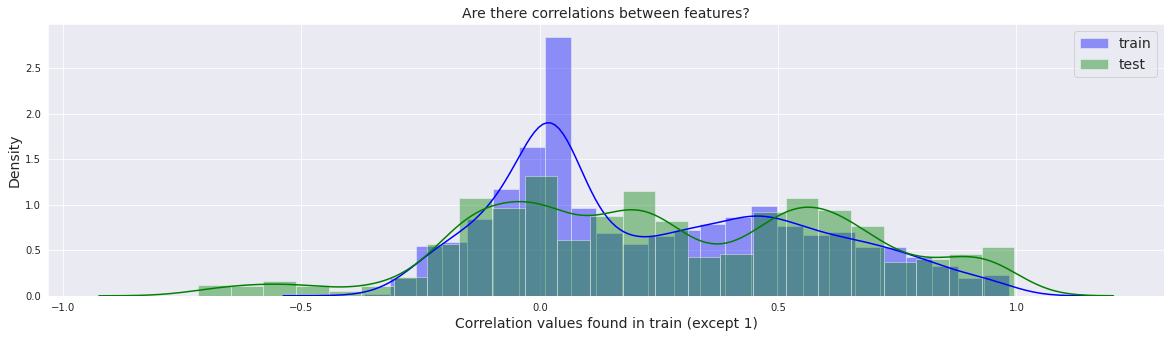

In [88]:
train_correlations = numerical_features_upd.corr()
train_correlations = train_correlations.values.flatten()
train_correlations = train_correlations[(train_correlations != 1) & (train_correlations != 0.691827)]

columns = numerical_features_upd.columns.tolist()
columns.remove("per_square_meter_price_log")
columns.remove('per_square_meter_price')

test_correlations = df_test[columns].corr()
test_correlations = test_correlations.values.flatten()
test_correlations = test_correlations[test_correlations != 1]

plt.figure(figsize=(20,5))
sns.distplot(train_correlations, color="Blue", label="train")
sns.distplot(test_correlations, color="Green", label="test")

plt.xlabel("Correlation values found in train (except 1)", size=14)
plt.title("Are there correlations between features?", size=14)
plt.legend(loc="best", fontsize=14)
plt.ylabel("Density", size=14)

## Correlation Heat Map

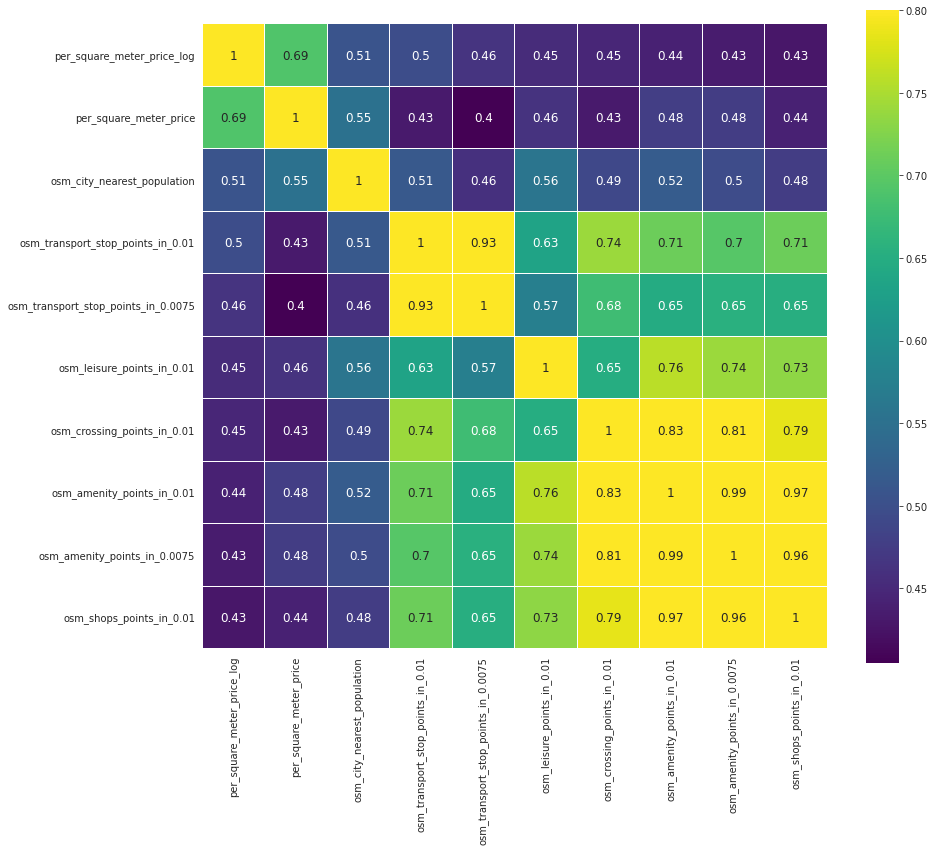

In [89]:
k = 10
cols = correlation.nlargest(k, "per_square_meter_price_log")["per_square_meter_price_log"].index
cm = np.corrcoef(df_train[cols].values.T)
fig, axes = plt.subplots(figsize = (14, 12))

sns.heatmap(
    cm,
    vmax=.8,
    linewidths=0.01,
    cmap="viridis",
    square=True,
    annot=True,
    linecolor="white",
    xticklabels=cols.values,
    annot_kws = {"size": 12},
    yticklabels=cols.values
)

__Короткие выводы:__

- сильной корреляции между переменными и `per_square_meter_price_log` нет. 
- есть взаимные корреляции между однотипными переменными `osm_amenity_point`, `osm_transport_stop`

## Нелинейная связь между признаками

In [90]:
from sklearn.ensemble import RandomForestRegressor

In [91]:
%%time
parameters = {"max_depth": 6, "n_estimators": 25, "random_state": 27, "n_jobs": 2}

forest = RandomForestRegressor(**parameters)

CPU times: user 32 µs, sys: 2 µs, total: 34 µs
Wall time: 37.4 µs


In [92]:
target = df_train['per_square_meter_price_log']

In [93]:
numerical_features_upd.head()

,lat,lng,osm_amenity_points_in_0.001,osm_amenity_points_in_0.005,osm_amenity_points_in_0.0075,osm_amenity_points_in_0.01,osm_building_points_in_0.001,osm_building_points_in_0.005,osm_building_points_in_0.0075,osm_building_points_in_0.01,osm_catering_points_in_0.001,osm_catering_points_in_0.005,osm_catering_points_in_0.0075,osm_catering_points_in_0.01,osm_city_closest_dist,osm_city_nearest_population,osm_crossing_closest_dist,osm_crossing_points_in_0.001,osm_crossing_points_in_0.005,osm_crossing_points_in_0.0075,osm_crossing_points_in_0.01,osm_culture_points_in_0.001,osm_culture_points_in_0.005,osm_culture_points_in_0.0075,osm_culture_points_in_0.01,osm_finance_points_in_0.001,osm_finance_points_in_0.005,osm_finance_points_in_0.0075,osm_finance_points_in_0.01,osm_healthcare_points_in_0.005,osm_healthcare_points_in_0.0075,osm_healthcare_points_in_0.01,osm_historic_points_in_0.005,osm_historic_points_in_0.0075,osm_historic_points_in_0.01,osm_hotels_points_in_0.005,osm_hotels_points_in_0.0075,osm_hotels_points_in_0.01,osm_leisure_points_in_0.005,osm_leisure_points_in_0.0075,osm_leisure_points_in_0.01,osm_offices_points_in_0.001,osm_offices_points_in_0.005,osm_offices_points_in_0.0075,osm_offices_points_in_0.01,osm_shops_points_in_0.001,osm_shops_points_in_0.005,osm_shops_points_in_0.0075,osm_shops_points_in_0.01,osm_subway_closest_dist,osm_train_stop_closest_dist,osm_train_stop_points_in_0.005,osm_train_stop_points_in_0.0075,osm_train_stop_points_in_0.01,osm_transport_stop_closest_dist,osm_transport_stop_points_in_0.005,osm_transport_stop_points_in_0.0075,osm_transport_stop_points_in_0.01,per_square_meter_price,reform_count_of_houses_1000,reform_count_of_houses_500,reform_house_population_1000,reform_house_population_500,reform_mean_floor_count_1000,reform_mean_floor_count_500,reform_mean_year_building_1000,reform_mean_year_building_500,total_square,realty_type,price_type,per_square_meter_price_log,total_square_log
0,57.998207,56.292797,4,19,35,52,0,0,0,0,0,2,4,6,3.293470,1055397.0,0.027732,3,6,17,34,0,0,1,1,0,0,1,2,2,3,4,0,0,1,0,0,0,0,1,2,0,1,2,4,4,11,20,28,269.024986,3.368385,0,0,0,0.002864,4,13,21,139937.500000,136,49,2503.0,765.0,5.762963,5.530612,1964.118519,1960.959184,32.0,10,0,11.848951,3.465736
1,55.574284,39.543835,3,24,37,59,0,0,0,1,0,2,2,6,43.950989,120184.0,0.089441,0,31,50,57,0,1,2,3,0,0,1,2,1,1,3,2,4,6,2,2,2,1,1,2,0,1,2,3,1,12,20,29,102.455451,1.476600,0,0,0,0.154661,4,10,11,60410.714286,146,37,1336.0,514.0,2.894366,3.527778,1952.321678,1957.222222,280.0,10,0,11.008922,5.634790
2,57.619140,39.850525,1,30,67,128,0,0,1,1,0,3,6,11,2.676293,603961.0,0.200995,0,15,29,53,0,1,2,2,0,0,5,9,0,1,3,0,0,0,0,0,1,2,3,6,0,1,6,9,1,16,37,80,243.361937,1.455127,0,0,0,0.118275,9,13,21,45164.761264,105,27,1883.0,573.0,6.141414,7.222222,1968.150000,1973.370370,297.4,110,0,10.718072,5.695078
3,53.897083,87.108604,0,0,5,21,0,0,0,1,0,0,1,4,15.618563,552105.0,0.861400,0,0,0,5,0,0,0,0,0,0,0,1,0,0,3,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,4,11,295.633502,9.400855,0,0,0,1.036523,0,0,3,28805.263158,75,2,1801.0,54.0,8.581081,9.000000,1992.716216,2014.000000,190.0,110,0,10.268313,5.247024
4,55.802590,37.487110,1,23,64,153,0,1,1,1,0,8,14,26,9.995325,232066.0,0.236744,0,14,40,78,0,0,0,0,0,0,3,9,2,7,14,0,2,2,1,1,3,3,4,9,0,8,8,12,0,8,33,89,1.110429,1.235503,0,0,0,0.235032,10,32,62,13222.591362,144,38,3090.0,619.0,7.263889,5.684211,1963.229167,1960.500000,60.2,10,0,9.489682,4.097672


In [94]:
forest.fit(numerical_features_upd.fillna(-9999).drop(["per_square_meter_price", 'per_square_meter_price_log'], axis=1), target)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=6, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=25, n_jobs=2, oob_score=False,
                      random_state=27, verbose=0, warm_start=False)

Text(0.5, 1.0, 'What are the top important features to start with?')

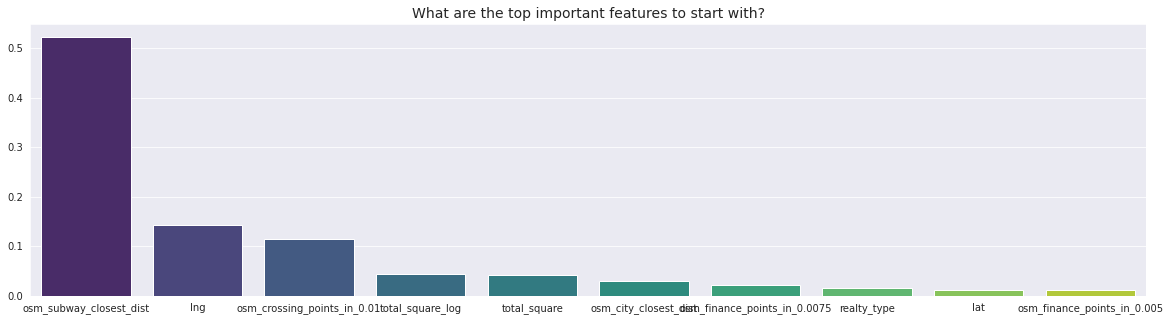

In [95]:
n_top = 10
importances = forest.feature_importances_
idx = np.argsort(importances)[::-1][0:n_top]
feature_names = numerical_features_upd.drop(["per_square_meter_price", 'per_square_meter_price_log'], axis=1).columns

plt.figure(figsize=(20, 5))
sns.barplot(x=feature_names[idx], y=importances[idx], palette="viridis")
plt.title("What are the top important features to start with?", size=14)

## Анализ распределения на обучении и тесте

## Kolmogorov-Smirnov Test

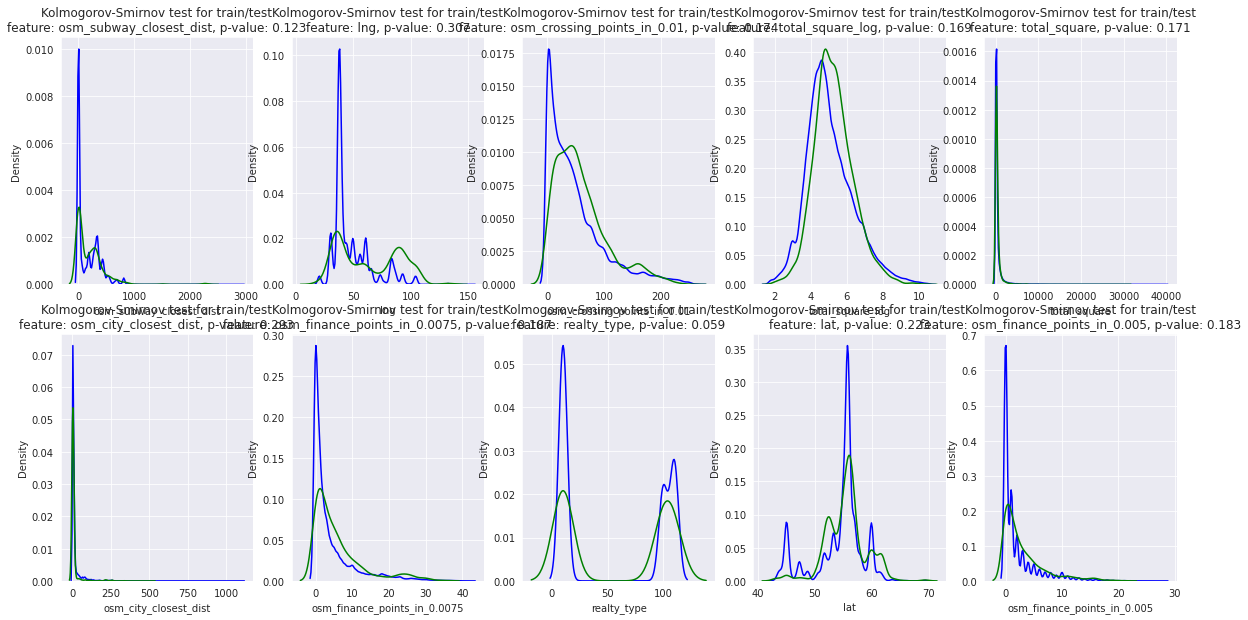

In [96]:
statistics_array = []
fig, axes = plt.subplots(2, 5, figsize=(20, 10))

for num, feature in enumerate(feature_names[idx]):
    statistic, pvalue = ks_2samp(
        df_train[feature].sample(1500), df_test[feature].sample(1500)
    )
    statistics_array.append(statistic)

    sns.kdeplot(df_train[feature], ax=axes[num//5, num%5], color="Blue", label="Train")
    sns.kdeplot(df_test[feature], ax=axes[num//5, num%5], color="Green", label="Test")

    axes[num//5, num%5].set_title(
        (f"Kolmogorov-Smirnov test for train/test\n"
        f"feature: {feature}, p-value: {round(statistic, 3)}")
    )

## Adversarial validation

In [97]:
X_adv = pd.concat([
    df_train[feature_names], df_test[feature_names]
])
y_adv = np.hstack(
    (np.ones(df_train.shape[0]), np.zeros(df_test.shape[0])))

X_adv = X_adv.reset_index(drop=True)

In [98]:
%%time
parameters = {"max_depth": 4, "n_estimators": 50, "random_state": 27, "n_jobs": 2}
model = xgb.XGBClassifier(**parameters)

cv = cross_val_score(
    estimator=model,
    X=X_adv, y=y_adv,
    scoring="roc_auc",
    cv=KFold(n_splits=3, shuffle=True, random_state=27)
)
print(f"CV-score: {round(np.mean(cv), 4)}")

CV-score: 0.9929
CPU times: user 2min 19s, sys: 519 ms, total: 2min 20s
Wall time: 1min 12s


Text(0.5, 1.0, 'Top Importance Features for Adversarial Validation (train vs test)')

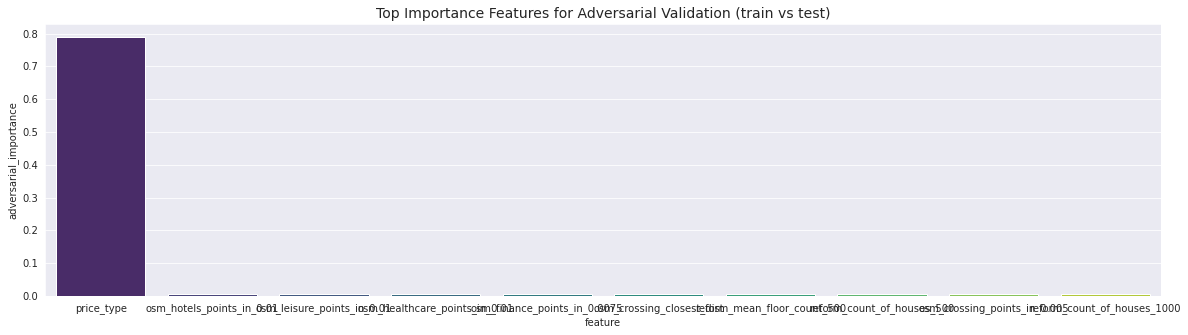

In [99]:
model.fit(X_adv, y_adv)

importance = pd.DataFrame({
    "feature": X_adv.columns,
    "adversarial_importance": model.feature_importances_
})
importance = importance.sort_values(by="adversarial_importance", ascending=False)
importance = importance.head(n=10)

plt.figure(figsize=(20, 5))
sns.barplot(x=importance["feature"], y=importance["adversarial_importance"], palette="viridis")
plt.title("Top Importance Features for Adversarial Validation (train vs test)", size=14)

In [100]:
#Adversarial validation явно показал, что стоит обратить особое внимание на price_type

__realty type в категориальные переменные__ 

In [101]:
df_train['realty_type'] = df_train['realty_type'].apply(str)

In [102]:
# Создадим edu_train в котором будут только "оценщики" (price_type=1)

In [103]:
edu_train = df_train[df_train['price_type'] == 1]

__наиболее высокая корреляция между 'log_per_square' и другими переменными__

In [104]:
k=10

In [105]:
corrmat = edu_train.corr()

In [106]:
cols = corrmat.nlargest(k, 'per_square_meter_price_log')['per_square_meter_price_log'].index

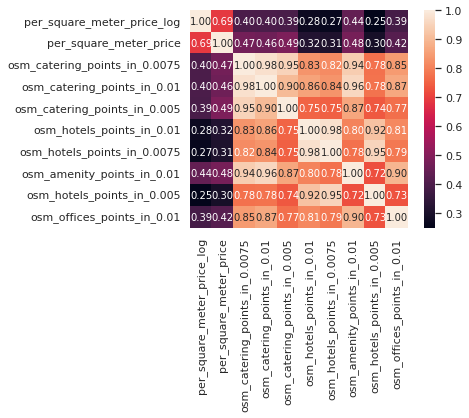

In [107]:
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [108]:
#Попробовал объединить эти переменные через MiniBatchKmeans - только хуже. Скор не прибавился. 

In [109]:
#Оставляем top-10 из osm

## Binning для price-per-meter

In [110]:
df_train['per_square_meter_price_log'].describe()

count    279792.000000
mean         10.932085
std           1.228818
min           5.965147
25%          10.298953
50%          10.997266
75%          11.689397
max          14.503645
Name: per_square_meter_price_log, dtype: float64

In [111]:
#шаг для классов

In [112]:
value_bins = np.linspace(min(df_train['per_square_meter_price_log']), max(df_train['per_square_meter_price_log']), num=10)

In [113]:
value_bins

array([ 5.96514724,  6.91386923,  7.86259123,  8.81131322,  9.76003522,
       10.70875722, 11.65747921, 12.60620121, 13.5549232 , 14.5036452 ])

In [114]:
step = (max(df_train['per_square_meter_price_log']) - min(df_train['per_square_meter_price_log']))/10

In [115]:
step

0.8538497957910067

In [116]:
spam = min(df_train['per_square_meter_price_log'])

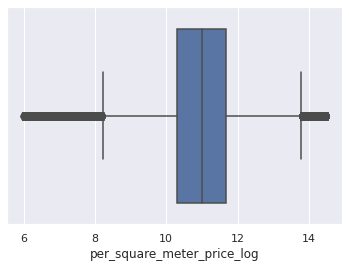

In [117]:
sns.boxplot(df_train['per_square_meter_price_log'])

In [118]:
bin_log_price = {1: [value_bins[0], value_bins[1]], 
               2: [value_bins[1], value_bins[2]], 
               3: [value_bins[2], value_bins[3]],
               4: [value_bins[3], value_bins[4]],
               5: [value_bins[4], value_bins[5]],
               6: [value_bins[5], value_bins[6]],
               7: [value_bins[6], value_bins[7]],
               8: [value_bins[7], value_bins[8]],
               9: [value_bins[8], value_bins[9]]}

In [119]:
bin_log_price

{1: [5.965147238790609, 6.91386923411395],
 2: [6.91386923411395, 7.862591229437291],
 3: [7.862591229437291, 8.811313224760632],
 4: [8.811313224760632, 9.76003522008397],
 5: [9.76003522008397, 10.708757215407314],
 6: [10.708757215407314, 11.657479210730653],
 7: [11.657479210730653, 12.606201206053994],
 8: [12.606201206053994, 13.554923201377335],
 9: [13.554923201377335, 14.503645196700676]}

In [120]:
for value in bin_log_price.values(): 
    value = list(value)

In [121]:
bin_log_price

{1: [5.965147238790609, 6.91386923411395],
 2: [6.91386923411395, 7.862591229437291],
 3: [7.862591229437291, 8.811313224760632],
 4: [8.811313224760632, 9.76003522008397],
 5: [9.76003522008397, 10.708757215407314],
 6: [10.708757215407314, 11.657479210730653],
 7: [11.657479210730653, 12.606201206053994],
 8: [12.606201206053994, 13.554923201377335],
 9: [13.554923201377335, 14.503645196700676]}

In [122]:
for log_pr in edu_train.per_square_meter_price_log.unique():
    for i in range(len(value_bins)-1):
        if log_pr>value_bins[i] and log_pr<value_bins[i+1]:
            edu_train.loc[df_train['per_square_meter_price_log'] == log_pr, 'class_price'] = i


In [123]:
edu_train.head()

,city,floor,id,lat,lng,osm_amenity_points_in_0.001,osm_amenity_points_in_0.005,osm_amenity_points_in_0.0075,osm_amenity_points_in_0.01,osm_building_points_in_0.001,osm_building_points_in_0.005,osm_building_points_in_0.0075,osm_building_points_in_0.01,osm_catering_points_in_0.001,osm_catering_points_in_0.005,osm_catering_points_in_0.0075,osm_catering_points_in_0.01,osm_city_closest_dist,osm_city_nearest_name,osm_city_nearest_population,osm_crossing_closest_dist,osm_crossing_points_in_0.001,osm_crossing_points_in_0.005,osm_crossing_points_in_0.0075,osm_crossing_points_in_0.01,osm_culture_points_in_0.001,osm_culture_points_in_0.005,osm_culture_points_in_0.0075,osm_culture_points_in_0.01,osm_finance_points_in_0.001,osm_finance_points_in_0.005,osm_finance_points_in_0.0075,osm_finance_points_in_0.01,osm_healthcare_points_in_0.005,osm_healthcare_points_in_0.0075,osm_healthcare_points_in_0.01,osm_historic_points_in_0.005,osm_historic_points_in_0.0075,osm_historic_points_in_0.01,osm_hotels_points_in_0.005,...,osm_hotels_points_in_0.01,osm_leisure_points_in_0.005,osm_leisure_points_in_0.0075,osm_leisure_points_in_0.01,osm_offices_points_in_0.001,osm_offices_points_in_0.005,osm_offices_points_in_0.0075,osm_offices_points_in_0.01,osm_shops_points_in_0.001,osm_shops_points_in_0.005,osm_shops_points_in_0.0075,osm_shops_points_in_0.01,osm_subway_closest_dist,osm_train_stop_closest_dist,osm_train_stop_points_in_0.005,osm_train_stop_points_in_0.0075,osm_train_stop_points_in_0.01,osm_transport_stop_closest_dist,osm_transport_stop_points_in_0.005,osm_transport_stop_points_in_0.0075,osm_transport_stop_points_in_0.01,per_square_meter_price,reform_count_of_houses_1000,reform_count_of_houses_500,reform_house_population_1000,reform_house_population_500,reform_mean_floor_count_1000,reform_mean_floor_count_500,reform_mean_year_building_1000,reform_mean_year_building_500,region,total_square,street,date,realty_type,price_type,New_floor,per_square_meter_price_log,total_square_log,class_price
275299,Красноярск,unknown,COL_62,56.063615,92.958428,0,7,14,26,0,0,0,0,0,0,0,2,7.795659,Красноярск,1095286.0,0.041323,2,6,25,35,0,0,0,2,0,1,2,3,0,0,0,0,0,1,0,...,0,1,1,1,0,0,0,0,0,5,10,15,1.087101,2.281425,0,0,0,0.052809,7,15,21,103120.697310,95,31,2670.0,940.0,7.136842,7.612903,1976.684211,1980.483871,Красноярский край,106.351104,S5845,2020-01-05,110,1,unknown,11.543655,4.666746,5.0
275300,Саратов,unknown,COL_71,51.534581,46.020549,13,198,345,462,0,0,0,0,4,44,66,89,0.987160,Саратов,842097.0,0.144936,0,4,34,59,0,1,6,9,0,13,22,27,7,17,27,4,7,9,2,...,7,11,16,20,1,11,21,28,8,125,218,286,357.425239,1.924421,0,0,0,0.045451,22,34,45,24874.371004,502,104,4886.0,943.0,4.144608,4.164557,1940.591549,1939.348837,Саратовская область,175.039602,S27968,2020-01-05,10,1,unknown,10.121593,5.165012,4.0
275301,Красноярск,unknown,COL_140,56.026884,92.818323,3,15,23,33,0,0,0,0,0,1,3,4,3.730568,Красноярск,1095286.0,0.141526,0,16,35,56,0,0,0,0,2,3,3,3,0,1,1,3,3,3,0,...,1,2,2,2,0,2,2,3,1,5,10,18,1.621353,0.579096,0,0,2,0.223787,6,11,18,80058.148547,175,66,4282.0,1445.0,6.851429,5.742424,1976.714286,1972.878788,Красноярский край,89.534921,S23597,2020-01-05,10,1,unknown,11.290509,4.494629,5.0
275302,Иркутск,unknown,COL_202,52.275528,104.251444,0,10,26,40,0,1,1,1,0,2,6,8,2.344310,Иркутск,623562.0,0.281491,0,6,6,6,0,0,0,0,0,0,0,1,0,4,4,0,0,0,0,...,2,1,2,2,0,1,1,1,0,5,11,21,61.562546,0.813594,0,0,2,0.266067,8,11,19,24649.765045,230,56,1887.0,612.0,4.597222,5.469388,1968.098131,1975.530612,Иркутская область,419.557752,S10587,2020-01-05,10,1,unknown,10.112523,6.039201,4.0
275303,Белгород,unknown,COL_207,50.576545,36.584197,4,48,73,92,0,0,6,6,1,7,11,15,2.170184,Белгород,384425.0,0.065996,1,19,28,46,1,5,10,11,0,2,2,4,3,3,4,2,2,2,0,...,2,10,11,15,0,0,0,0,1,19,29,36,555.411948,2.505330,0,0,0,0.092583,7,17,22,39135.228322,131,35,3837.0,1073.0,9.157480,9.088235,1983.125984,1980.470588,Белгородская область,1098.703185,S11220,2020-01-05,10,1,unknown,10.574778,7.001886,4.0


In [124]:
for log_pr in df_train.per_square_meter_price_log.unique():
      for i in range(len(value_bins)-1):
        if log_pr>value_bins[i] and log_pr<value_bins[i+1]:
            df_train.loc[df_train['per_square_meter_price_log'] == log_pr, 'class_price'] = i

In [125]:
df_train['class_price'] = df_train.class_price.fillna(0)

In [126]:
df_train.class_price.isnull().sum()

0

## Target encoding and class encoding by geo

In [127]:
df_train[['lat', 'lng', 'per_square_meter_price_log']].head()

,lat,lng,per_square_meter_price_log
0,57.998207,56.292797,11.848951
1,55.574284,39.543835,11.008922
2,57.619140,39.850525,10.718072
3,53.897083,87.108604,10.268313
4,55.802590,37.487110,9.489682


In [128]:
## округлим значения долготы и ширины, сконцентрировав множество объектов в одной точке

In [129]:
df_train['latitude'] = np.round(df_train['lat'], 0)
df_train['longitude'] = np.round(df_train['lng'], 0)
df_train[['latitude', 'longitude', 'per_square_meter_price_log']].head()

,latitude,longitude,per_square_meter_price_log
0,58.0,56.0,11.848951
1,56.0,40.0,11.008922
2,58.0,40.0,10.718072
3,54.0,87.0,10.268313
4,56.0,37.0,9.489682


In [130]:
df_test['latitude'] = np.round(df_test['lat'], 0)
df_test['longitude'] = np.round(df_test['lng'], 0)

In [131]:
df_train[['latitude', 'longitude']].drop_duplicates().shape[0]

668

In [132]:
df_g = df_train.groupby(['latitude', 'longitude'])['per_square_meter_price_log'].mean().to_dict()


In [133]:
df_g_std = df_train.groupby(['latitude', 'longitude'])['per_square_meter_price_log'].std().to_dict()

In [134]:
df_train['target_mean_by_geo'] = df_train.set_index(['latitude', 'longitude']).index.map(df_g)

In [135]:
df_test['target_mean_by_geo'] = df_test.set_index(['latitude', 'longitude']).index.map(df_g)

In [136]:
df_train['target_std_by_geo'] = df_train.set_index(['latitude', 'longitude']).index.map(df_g_std)

In [137]:
df_test['target_std_by_geo'] = df_test.set_index(['latitude', 'longitude']).index.map(df_g_std)

In [138]:
df_train.head()

,city,floor,id,lat,lng,osm_amenity_points_in_0.001,osm_amenity_points_in_0.005,osm_amenity_points_in_0.0075,osm_amenity_points_in_0.01,osm_building_points_in_0.001,osm_building_points_in_0.005,osm_building_points_in_0.0075,osm_building_points_in_0.01,osm_catering_points_in_0.001,osm_catering_points_in_0.005,osm_catering_points_in_0.0075,osm_catering_points_in_0.01,osm_city_closest_dist,osm_city_nearest_name,osm_city_nearest_population,osm_crossing_closest_dist,osm_crossing_points_in_0.001,osm_crossing_points_in_0.005,osm_crossing_points_in_0.0075,osm_crossing_points_in_0.01,osm_culture_points_in_0.001,osm_culture_points_in_0.005,osm_culture_points_in_0.0075,osm_culture_points_in_0.01,osm_finance_points_in_0.001,osm_finance_points_in_0.005,osm_finance_points_in_0.0075,osm_finance_points_in_0.01,osm_healthcare_points_in_0.005,osm_healthcare_points_in_0.0075,osm_healthcare_points_in_0.01,osm_historic_points_in_0.005,osm_historic_points_in_0.0075,osm_historic_points_in_0.01,osm_hotels_points_in_0.005,...,osm_offices_points_in_0.001,osm_offices_points_in_0.005,osm_offices_points_in_0.0075,osm_offices_points_in_0.01,osm_shops_points_in_0.001,osm_shops_points_in_0.005,osm_shops_points_in_0.0075,osm_shops_points_in_0.01,osm_subway_closest_dist,osm_train_stop_closest_dist,osm_train_stop_points_in_0.005,osm_train_stop_points_in_0.0075,osm_train_stop_points_in_0.01,osm_transport_stop_closest_dist,osm_transport_stop_points_in_0.005,osm_transport_stop_points_in_0.0075,osm_transport_stop_points_in_0.01,per_square_meter_price,reform_count_of_houses_1000,reform_count_of_houses_500,reform_house_population_1000,reform_house_population_500,reform_mean_floor_count_1000,reform_mean_floor_count_500,reform_mean_year_building_1000,reform_mean_year_building_500,region,total_square,street,date,realty_type,price_type,New_floor,per_square_meter_price_log,total_square_log,class_price,latitude,longitude,target_mean_by_geo,target_std_by_geo
0,Пермь,unknown,COL_0,57.998207,56.292797,4,19,35,52,0,0,0,0,0,2,4,6,3.293470,Пермь,1055397.0,0.027732,3,6,17,34,0,0,1,1,0,0,1,2,2,3,4,0,0,1,0,...,0,1,2,4,4,11,20,28,269.024986,3.368385,0,0,0,0.002864,4,13,21,139937.500000,136,49,2503.0,765.0,5.762963,5.530612,1964.118519,1960.959184,Пермский край,32.0,S27289,2020-01-05,10,0,unknown,11.848951,3.465736,6.0,58.0,56.0,10.572988,0.942479
1,Шатура,unknown,COL_1,55.574284,39.543835,3,24,37,59,0,0,0,1,0,2,2,6,43.950989,Орехово-Зуево,120184.0,0.089441,0,31,50,57,0,1,2,3,0,0,1,2,1,1,3,2,4,6,2,...,0,1,2,3,1,12,20,29,102.455451,1.476600,0,0,0,0.154661,4,10,11,60410.714286,146,37,1336.0,514.0,2.894366,3.527778,1952.321678,1957.222222,Московская область,280.0,S17052,2020-01-05,10,0,unknown,11.008922,5.634790,5.0,56.0,40.0,10.185017,1.097180
2,Ярославль,unknown,COL_2,57.619140,39.850525,1,30,67,128,0,0,1,1,0,3,6,11,2.676293,Ярославль,603961.0,0.200995,0,15,29,53,0,1,2,2,0,0,5,9,0,1,3,0,0,0,0,...,0,1,6,9,1,16,37,80,243.361937,1.455127,0,0,0,0.118275,9,13,21,45164.761264,105,27,1883.0,573.0,6.141414,7.222222,1968.150000,1973.370370,Ярославская область,297.4,S16913,2020-01-05,110,0,unknown,10.718072,5.695078,5.0,58.0,40.0,10.607445,0.849701
3,Новокузнецк,unknown,COL_3,53.897083,87.108604,0,0,5,21,0,0,0,1,0,0,1,4,15.618563,Новокузнецк,552105.0,0.861400,0,0,0,5,0,0,0,0,0,0,0,1,0,0,3,0,0,1,0,...,0,0,0,0,0,0,4,11,295.633502,9.400855,0,0,0,1.036523,0,0,3,28805.263158,75,2,1801.0,54.0,8.581081,9.000000,1992.716216,2014.000000,Кемеровская область,190.0,S10148,2020-01-05,110,0,unknown,10.268313,5.247024,4.0,54.0,87.0,9.959863,1.080528
4,Москва,unknown,COL_4,55.802590,37.487110,1,23,64,153,0,1,1,1,0,8,14,26,9.995325,Химки,232066.0,0.236744,0,14,40,78,0,0,0,0,0,0,3,9,2,7,14,0,2,2,1,...,0,8,8,12,0,8,33,89,1.110429,1.235503,0,0,0,0.235032,10,32,62,13222.591362,144,38,3090.0,619.0,7.263889,5.684211,1963.229167,1960.500000,Москва,60.2,S1338,2020-01-05,10,0,unknown,9.489682,4.097672,3.0,56.0,37.0,11.678069,0.898752


In [139]:
df_g_class = df_train.groupby(['latitude', 'longitude'])['class_price'].mean().to_dict()

In [140]:
df_train['class_price_geo'] = df_train.set_index(['latitude', 'longitude']).index.map(df_g_class)

In [141]:
df_test['class_price_geo'] = df_test.set_index(['latitude', 'longitude']).index.map(df_g_class)

In [142]:
#датасет по широте, долготе и типу класса

In [143]:
#for lat_test, long_test in zip(df_test['latitude'], df_test['longitude']):
#  for lat_train, long_train in zip(edu_train['latitude'], edu_train['longitude']):
#    spam=0 
#    count = 0 
#    if lat_test == lat_train and long_test == long_train:
#      spam = edu_train[(edu_train['latitude']==lat_test) & (edu_train['longitude']==long_test)].index
#      for idx in range(len(spam)):
#        df_test['class_price'] = edu_train.loc[spam[idx], 'class_price']

## Continue: отбор признаков, схема валидации


In [144]:
features_1 = ['city',
              'lat', 'lng',
              'osm_amenity_points_in_0.01', 
'osm_building_points_in_0.01', 
'osm_catering_points_in_0.001', 
'osm_catering_points_in_0.01', 
'osm_city_closest_dist', 
'osm_city_nearest_population', 
'osm_crossing_closest_dist', 
'osm_crossing_points_in_0.001', 
'osm_crossing_points_in_0.01', 
'osm_culture_points_in_0.01', 
'osm_finance_points_in_0.01', 
'osm_healthcare_points_in_0.01', 
'osm_historic_points_in_0.005',
'osm_hotels_points_in_0.01', 
'osm_offices_points_in_0.01',
'osm_shops_points_in_0.01',
'total_square_log', 
 'region',
 'realty_type', 'street',  'New_floor',
 'class_price_geo', 'target_std_by_geo', 'target_mean_by_geo']

In [145]:
main_model = CatBoostRegressor(iterations=1500,
                                learning_rate=0.015,
                                depth=12,
                                l2_leaf_reg=8,
                                loss_function='RMSE',
                                task_type = 'СPU',
                                early_stopping_rounds= 90,
                                #class_weights=[0.95,0.05],
                                random_seed=42,
                                verbose= 100
                                )

In [146]:
text_cols = []
categorical_cols = ['city', 'street', 'New_floor', 'region', 'realty_type']

In [147]:
edu_train = df_train[df_train['price_type'] == 1].reset_index(drop=True).copy()

In [148]:
edu_train.head()

,city,floor,id,lat,lng,osm_amenity_points_in_0.001,osm_amenity_points_in_0.005,osm_amenity_points_in_0.0075,osm_amenity_points_in_0.01,osm_building_points_in_0.001,osm_building_points_in_0.005,osm_building_points_in_0.0075,osm_building_points_in_0.01,osm_catering_points_in_0.001,osm_catering_points_in_0.005,osm_catering_points_in_0.0075,osm_catering_points_in_0.01,osm_city_closest_dist,osm_city_nearest_name,osm_city_nearest_population,osm_crossing_closest_dist,osm_crossing_points_in_0.001,osm_crossing_points_in_0.005,osm_crossing_points_in_0.0075,osm_crossing_points_in_0.01,osm_culture_points_in_0.001,osm_culture_points_in_0.005,osm_culture_points_in_0.0075,osm_culture_points_in_0.01,osm_finance_points_in_0.001,osm_finance_points_in_0.005,osm_finance_points_in_0.0075,osm_finance_points_in_0.01,osm_healthcare_points_in_0.005,osm_healthcare_points_in_0.0075,osm_healthcare_points_in_0.01,osm_historic_points_in_0.005,osm_historic_points_in_0.0075,osm_historic_points_in_0.01,osm_hotels_points_in_0.005,...,osm_offices_points_in_0.005,osm_offices_points_in_0.0075,osm_offices_points_in_0.01,osm_shops_points_in_0.001,osm_shops_points_in_0.005,osm_shops_points_in_0.0075,osm_shops_points_in_0.01,osm_subway_closest_dist,osm_train_stop_closest_dist,osm_train_stop_points_in_0.005,osm_train_stop_points_in_0.0075,osm_train_stop_points_in_0.01,osm_transport_stop_closest_dist,osm_transport_stop_points_in_0.005,osm_transport_stop_points_in_0.0075,osm_transport_stop_points_in_0.01,per_square_meter_price,reform_count_of_houses_1000,reform_count_of_houses_500,reform_house_population_1000,reform_house_population_500,reform_mean_floor_count_1000,reform_mean_floor_count_500,reform_mean_year_building_1000,reform_mean_year_building_500,region,total_square,street,date,realty_type,price_type,New_floor,per_square_meter_price_log,total_square_log,class_price,latitude,longitude,target_mean_by_geo,target_std_by_geo,class_price_geo
0,Красноярск,unknown,COL_62,56.063615,92.958428,0,7,14,26,0,0,0,0,0,0,0,2,7.795659,Красноярск,1095286.0,0.041323,2,6,25,35,0,0,0,2,0,1,2,3,0,0,0,0,0,1,0,...,0,0,0,0,5,10,15,1.087101,2.281425,0,0,0,0.052809,7,15,21,103120.697310,95,31,2670.0,940.0,7.136842,7.612903,1976.684211,1980.483871,Красноярский край,106.351104,S5845,2020-01-05,110,1,unknown,11.543655,4.666746,5.0,56.0,93.0,10.744187,0.891938,4.521663
1,Саратов,unknown,COL_71,51.534581,46.020549,13,198,345,462,0,0,0,0,4,44,66,89,0.987160,Саратов,842097.0,0.144936,0,4,34,59,0,1,6,9,0,13,22,27,7,17,27,4,7,9,2,...,11,21,28,8,125,218,286,357.425239,1.924421,0,0,0,0.045451,22,34,45,24874.371004,502,104,4886.0,943.0,4.144608,4.164557,1940.591549,1939.348837,Саратовская область,175.039602,S27968,2020-01-05,10,1,unknown,10.121593,5.165012,4.0,52.0,46.0,10.400555,0.775801,4.190679
2,Красноярск,unknown,COL_140,56.026884,92.818323,3,15,23,33,0,0,0,0,0,1,3,4,3.730568,Красноярск,1095286.0,0.141526,0,16,35,56,0,0,0,0,2,3,3,3,0,1,1,3,3,3,0,...,2,2,3,1,5,10,18,1.621353,0.579096,0,0,2,0.223787,6,11,18,80058.148547,175,66,4282.0,1445.0,6.851429,5.742424,1976.714286,1972.878788,Красноярский край,89.534921,S23597,2020-01-05,10,1,unknown,11.290509,4.494629,5.0,56.0,93.0,10.744187,0.891938,4.521663
3,Иркутск,unknown,COL_202,52.275528,104.251444,0,10,26,40,0,1,1,1,0,2,6,8,2.344310,Иркутск,623562.0,0.281491,0,6,6,6,0,0,0,0,0,0,0,1,0,4,4,0,0,0,0,...,1,1,1,0,5,11,21,61.562546,0.813594,0,0,2,0.266067,8,11,19,24649.765045,230,56,1887.0,612.0,4.597222,5.469388,1968.098131,1975.530612,Иркутская область,419.557752,S10587,2020-01-05,10,1,unknown,10.112523,6.039201,4.0,52.0,104.0,10.580900,0.802999,4.365405
4,Белгород,unknown,COL_207,50.576545,36.584197,4,48,73,92,0,0,6,6,1,7,11,15,2.170184,Белгород,384425.0,0.065996,1,19,28,46,1,5,10,11,0,2,2,4,3,3,4,2,2,2,0,...,0,0,0,1,19,29,36,555.411948,2.505330,0,0,0,0.092583,7,17,22,39135.228322,131,35,3837.0,1073.0,9.157480,9.088235,1983.125984,1980.470588,Белгородская область,1098.703185,S11220,2020-01-05,10,1,unknown,10.574778,7.001886,4.0,51.0,37.0,10.751201,0.808327

In [149]:
df_test.head()

,city,floor,id,osm_amenity_points_in_0.001,osm_amenity_points_in_0.005,osm_amenity_points_in_0.0075,osm_amenity_points_in_0.01,osm_building_points_in_0.001,osm_building_points_in_0.005,osm_building_points_in_0.0075,osm_building_points_in_0.01,osm_catering_points_in_0.001,osm_catering_points_in_0.005,osm_catering_points_in_0.0075,osm_catering_points_in_0.01,osm_city_closest_dist,osm_city_nearest_name,osm_city_nearest_population,osm_crossing_closest_dist,osm_crossing_points_in_0.001,osm_crossing_points_in_0.005,osm_crossing_points_in_0.0075,osm_crossing_points_in_0.01,osm_culture_points_in_0.001,osm_culture_points_in_0.005,osm_culture_points_in_0.0075,osm_culture_points_in_0.01,osm_finance_points_in_0.001,osm_finance_points_in_0.005,osm_finance_points_in_0.0075,osm_finance_points_in_0.01,osm_healthcare_points_in_0.005,osm_healthcare_points_in_0.0075,osm_healthcare_points_in_0.01,osm_historic_points_in_0.005,osm_historic_points_in_0.0075,osm_historic_points_in_0.01,osm_hotels_points_in_0.005,osm_hotels_points_in_0.0075,osm_hotels_points_in_0.01,...,osm_offices_points_in_0.001,osm_offices_points_in_0.005,osm_offices_points_in_0.0075,osm_offices_points_in_0.01,osm_shops_points_in_0.001,osm_shops_points_in_0.005,osm_shops_points_in_0.0075,osm_shops_points_in_0.01,osm_subway_closest_dist,osm_train_stop_closest_dist,osm_train_stop_points_in_0.005,osm_train_stop_points_in_0.0075,osm_train_stop_points_in_0.01,osm_transport_stop_closest_dist,osm_transport_stop_points_in_0.005,osm_transport_stop_points_in_0.0075,osm_transport_stop_points_in_0.01,reform_count_of_houses_1000,reform_count_of_houses_500,reform_house_population_1000,reform_house_population_500,reform_mean_floor_count_1000,reform_mean_floor_count_500,reform_mean_year_building_1000,reform_mean_year_building_500,region,lat,lng,total_square,street,date,realty_type,price_type,New_floor,total_square_log,latitude,longitude,target_mean_by_geo,target_std_by_geo,class_price_geo
0,Курск,1.0,COL_289284,7,55,85,117,0,0,0,0,0,2,6,10,4.101661,Курск,443212.0,0.147072,0,7,7,19,0,0,0,0,1,2,3,3,5,5,5,2,2,4,7,7,8,...,0,0,0,1,5,36,61,83,435.363535,5.636811,0,0,0,0.108668,11,15,27,184,78,1997.0,743.0,4.325000,4.211268,1966.471591,1966.740260,Курская область,51.709255,36.147908,156.148996,S6983,2020-09-06,100,1,1,5.050811,52.0,36.0,10.315580,0.891987,4.101883
1,Сургут,1.0,COL_289305,8,70,112,140,0,0,0,0,0,7,8,13,4.084249,Сургут,380632.0,0.162480,0,18,33,50,0,0,0,1,1,2,5,6,3,6,8,1,1,1,3,5,5,...,0,3,5,8,4,51,81,99,693.447931,9.641591,0,0,0,0.091416,9,11,19,118,44,2823.0,1019.0,5.389831,5.500000,1988.259259,1989.068182,Ханты-Мансийский АО,61.233240,73.462509,190.737943,S29120,2020-09-06,110,1,1,5.250900,61.0,73.0,10.784976,0.765699,4.569550
2,Тюмень,-1.0,COL_289318,3,28,67,122,0,0,0,0,0,9,18,34,1.291974,Тюмень,744554.0,0.075807,1,21,57,92,0,0,1,2,0,1,4,5,2,3,3,1,2,5,0,1,1,...,0,1,1,3,3,15,34,63,298.904686,1.803999,0,0,0,0.120308,6,20,29,150,51,3484.0,1332.0,7.915493,8.250000,1985.880282,1991.458333,Тюменская область,57.143110,65.554573,457.118051,S23731,2020-09-06,10,1,-1,6.124942,57.0,66.0,10.872439,0.817103,4.668941
3,Иркутск,1.0,COL_289354,5,76,139,231,0,0,0,0,0,28,52,84,0.914598,Иркутск,623562.0,0.043604,1,30,60,95,1,8,13,18,0,5,6,10,5,8,12,12,20,32,1,8,18,...,0,7,11,16,3,14,26,51,60.224709,1.338052,0,0,0,0.079332,9,18,29,252,86,1975.0,666.0,3.276860,3.012048,1947.073276,1941.657895,Иркутская область,52.281380,104.282975,66.503622,S14207,2020-09-06,100,1,1,4.197256,52.0,104.0,10.580900,0.802999,4.365405
4,Курск,unknown,COL_289399,8,105,189,279,0,0,2,9,1,24,40,54,1.300135,Курск,443212.0,0.084204,1,40,72,84,1,10,12,12,3,10,14,21,2,6,6,10,14,17,1,1,1,...,0,2,12,16,1,49,98,156,432.530106,2.440972,0,0,0,0.093642,12,26,37,114,31,1044.0,394.0,4.346154,4.827586,1948.764151,1946.689655,Курская область,51.729706,36.194019,23.864915,S20658,2020-09-06,10,1,unknown,3.172409,52.0,36.0,10.315580,0.891987,4.101883


In [150]:
edu_train.shape

(4493, 86)

In [151]:
df_test.shape

(2974, 83)

In [152]:
target_log = 'per_square_meter_price_log'

In [153]:
def cross_validate(df_train, df_test, iterations, cat_features, verbose, n_cv, features):

    catboost_regressor = CatBoostRegressor(iterations=iterations,cat_features=cat_features, random_seed=42, task_type='GPU')
    
    idxs = [[] for i in range(n_cv)]
    for i in range(len(df_test)):
        r = np.random.randint(0, n_cv)
        idxs[r].append(df_test.index[i])
    X_train = pd.DataFrame()
    X_test  = pd.DataFrame()
    y_train = pd.DataFrame()
    y_test  = pd.DataFrame()
    scores = []
    feature_imp_lst = []
    for i in range(len(idxs)):
        print('Iter: ', i)
        train_idxs = []
        for idx in idxs[:i]+idxs[i+1:]:
            train_idxs+=idx
        X_train =  df_train[features].loc[train_idxs, :]
        X_test  =  df_test[features].loc[idxs[i]]
        y_train =  df_train.loc[train_idxs, :].per_square_meter_price_log
        y_test  =  df_train.loc[idxs[i], :].per_square_meter_price_log
        catboost_regressor.fit(X_train, y_train, verbose=verbose, plot=True)
        y_pred = catboost_regressor.predict(X_test)
        #score = deviation_metric(y_test, y_pred, isLog=True)
        #scores.append(score)
        feature_imp_lst.append(catboost_regressor.feature_importances_)
        #print("Score: ", score)   
    #print('Score: ', sum(scores)/len(scores))
    feature_imps = []
    for i in range(len(sum(feature_imp_lst)/len(feature_imp_lst))):
        feature_imps.append((X_train.columns[i], catboost_regressor.feature_importances_[i]))
    feature_imps = sorted(feature_imps, key = lambda x: x[1])
    feature_imps.reverse()
    print('Feature importances')
    print(feature_imps)

In [154]:
categorical_cols = ['city', 'street', 'New_floor', 'region', 'realty_type']

In [155]:
df_train, df_test = edu_train[features_1], df_test[features_1]

In [156]:
iterations=1000
verbose=100
n_cv = 4

catboost_regressor = cross_validate(edu_train, df_test, iterations, categorical_cols, verbose, n_cv, features_1)

Iter:  0


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.044863
0:	learn: 0.5590919	total: 44.3ms	remaining: 44.3s
100:	learn: 0.3231736	total: 4.61s	remaining: 41.1s
200:	learn: 0.3062185	total: 9.1s	remaining: 36.2s
300:	learn: 0.2931310	total: 13.6s	remaining: 31.6s
400:	learn: 0.2823199	total: 18.1s	remaining: 27s
500:	learn: 0.2749975	total: 22.7s	remaining: 22.6s
600:	learn: 0.2689300	total: 27.3s	remaining: 18.1s
700:	learn: 0.2640278	total: 32s	remaining: 13.6s
800:	learn: 0.2584171	total: 36.6s	remaining: 9.09s
900:	learn: 0.2538713	total: 41.1s	remaining: 4.52s
999:	learn: 0.2500580	total: 45.7s	remaining: 0us
Iter:  1


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.044831
0:	learn: 0.5802743	total: 43.9ms	remaining: 43.8s
100:	learn: 0.3247903	total: 3.74s	remaining: 33.3s
200:	learn: 0.3062612	total: 7.79s	remaining: 31s
300:	learn: 0.2902382	total: 11.9s	remaining: 27.6s
400:	learn: 0.2798615	total: 16.2s	remaining: 24.2s
500:	learn: 0.2731527	total: 20.6s	remaining: 20.5s
600:	learn: 0.2661446	total: 25.1s	remaining: 16.7s
700:	learn: 0.2616645	total: 29.6s	remaining: 12.6s
800:	learn: 0.2574739	total: 34.2s	remaining: 8.5s
900:	learn: 0.2546598	total: 38.8s	remaining: 4.26s
999:	learn: 0.2515036	total: 43.2s	remaining: 0us
Iter:  2


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.044926
0:	learn: 0.5842630	total: 44.3ms	remaining: 44.3s
100:	learn: 0.3247944	total: 3.81s	remaining: 33.9s
200:	learn: 0.3069600	total: 7.45s	remaining: 29.6s
300:	learn: 0.2941233	total: 11s	remaining: 25.6s
400:	learn: 0.2854990	total: 14.7s	remaining: 22s
500:	learn: 0.2760664	total: 18.5s	remaining: 18.4s
600:	learn: 0.2692030	total: 22.2s	remaining: 14.8s
700:	learn: 0.2628580	total: 26.1s	remaining: 11.1s
800:	learn: 0.2561852	total: 30.3s	remaining: 7.53s
900:	learn: 0.2512199	total: 34.8s	remaining: 3.82s
999:	learn: 0.2472455	total: 39.1s	remaining: 0us
Iter:  3


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.044858
0:	learn: 0.5693492	total: 41.1ms	remaining: 41.1s
100:	learn: 0.3075861	total: 3.75s	remaining: 33.4s
200:	learn: 0.2841361	total: 7.42s	remaining: 29.5s
300:	learn: 0.2698554	total: 11s	remaining: 25.6s
400:	learn: 0.2612714	total: 14.8s	remaining: 22.1s
500:	learn: 0.2548128	total: 18.4s	remaining: 18.4s
600:	learn: 0.2501331	total: 22.2s	remaining: 14.7s
700:	learn: 0.2463763	total: 25.9s	remaining: 11s
800:	learn: 0.2424210	total: 29.7s	remaining: 7.37s
900:	learn: 0.2390381	total: 33.5s	remaining: 3.68s
999:	learn: 0.2357598	total: 37.5s	remaining: 0us
Feature importances
[('class_price_geo', 20.68442273363802), ('total_square_log', 11.738780073375848), ('osm_catering_points_in_0.01', 6.834232121232014), ('region', 6.677862470709837), ('city', 6.597070128950878), ('target_mean_by_geo', 6.359738437497442), ('osm_hotels_points_in_0.01', 4.9013667911349), ('New_floor', 3.7748693563366946), ('realty_type', 3.0035451610046806), ('osm_crossing_points_in_0.

In [159]:
catboost_regressor = CatBoostRegressor(iterations=iterations,cat_features=categorical_cols, random_seed=42, task_type='GPU')

In [160]:
catboost_regressor.fit(edu_train[features_1], edu_train['per_square_meter_price_log'], verbose=verbose, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.049181
0:	learn: 0.5737229	total: 46.1ms	remaining: 46s
100:	learn: 0.3324279	total: 4.72s	remaining: 42s
200:	learn: 0.3178042	total: 9.44s	remaining: 37.5s
300:	learn: 0.3084630	total: 14.1s	remaining: 32.7s
400:	learn: 0.3018742	total: 18.7s	remaining: 27.9s
500:	learn: 0.2970267	total: 23.5s	remaining: 23.5s
600:	learn: 0.2920274	total: 28.2s	remaining: 18.8s
700:	learn: 0.2869748	total: 33s	remaining: 14.1s
800:	learn: 0.2834543	total: 37.7s	remaining: 9.38s
900:	learn: 0.2795719	total: 42.6s	remaining: 4.68s
999:	learn: 0.2755818	total: 47.3s	remaining: 0us


In [162]:
test_pred = catboost_regressor.predict(df_test)
df_test['per_square_meter_price'] = np.exp(test_pred)

In [164]:
df_test.columns

Index(['city', 'lat', 'lng', 'osm_amenity_points_in_0.01',
       'osm_building_points_in_0.01', 'osm_catering_points_in_0.001',
       'osm_catering_points_in_0.01', 'osm_city_closest_dist',
       'osm_city_nearest_population', 'osm_crossing_closest_dist',
       'osm_crossing_points_in_0.001', 'osm_crossing_points_in_0.01',
       'osm_culture_points_in_0.01', 'osm_finance_points_in_0.01',
       'osm_healthcare_points_in_0.01', 'osm_historic_points_in_0.005',
       'osm_hotels_points_in_0.01', 'osm_offices_points_in_0.01',
       'osm_shops_points_in_0.01', 'total_square_log', 'region', 'realty_type',
       'street', 'New_floor', 'class_price_geo', 'target_std_by_geo',
       'target_mean_by_geo', 'per_square_meter_price'],
      dtype='object')

In [165]:
df_test_2 = pd.read_csv(path_test)

In [166]:
df_test['id'] = df_test_2['id']

In [167]:
df_test[['id','per_square_meter_price']].to_csv('submit.csv',header=True,index=False)

In [ ]:
from google.colab import files

In [ ]:
files.download('submit.csv')

In [ ]:
!ls

In [ ]:
#скор на public leaderboard оказался 1.3716007756439368
#скор на private leaderboard	1.1709390988809407
#83 место